In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from db_queries import get_location_metadata

import warnings
warnings.simplefilter('ignore')


In [2]:
est_dfs = {}
for file_label in ['model_results_ln_cumul', 'model_results_cumul', 'model_results']:
    est_df = pd.read_csv(f'/ihme/covid-19/deaths/dev/2020_05_14_cfrmod_split/{file_label}.csv')
    est_df['date'] = pd.to_datetime(est_df['date'])
    est_df = est_df.sort_values(['location_id', 'date'])
    est_df['Cumulative mean'] = est_df[[dcol for dcol in est_df.columns if dcol.startswith('draw_')]].mean(axis=1)
    est_df['Cumulative lower'] = np.percentile(est_df[[dcol for dcol in est_df.columns if dcol.startswith('draw_')]], 
                                               2.5, axis=1)
    est_df['Cumulative upper'] = np.percentile(est_df[[dcol for dcol in est_df.columns if dcol.startswith('draw_')]], 
                                               97.5, axis=1)
    est_df['Daily mean'] = np.nan
    est_df['Daily mean'][1:] = np.diff(est_df[[dcol for dcol in est_df.columns if dcol.startswith('draw_')]], axis=0).mean(axis=1)
    est_df['Daily lower'] = np.nan
    est_df['Daily lower'][1:] = np.percentile(np.diff(est_df[[dcol for dcol in est_df.columns if dcol.startswith('draw_')]], 
                                                      axis=0), 2.5, axis=1)
    est_df['Daily upper'] = np.nan
    est_df['Daily upper'][1:] = np.percentile(np.diff(est_df[[dcol for dcol in est_df.columns if dcol.startswith('draw_')]], 
                                                      axis=0), 97.5, axis=1)
    first_day = est_df['date'] == est_df.groupby('location_id')['date'].transform(min)
    est_df.loc[first_day, 'Daily mean'] = est_df['Cumulative mean']
    est_df.loc[first_day, 'Daily lower'] = est_df['Cumulative lower']
    est_df.loc[first_day, 'Daily upper'] = est_df['Cumulative upper']
    est_dfs.update({file_label:est_df[['location_id', 'date', 
                                       'Cumulative mean', 'Cumulative lower', 'Cumulative upper', 
                                       'Daily mean', 'Daily lower', 'Daily upper'] + \
                                       [dcol for dcol in est_df.columns if dcol.startswith('draw_')]]})

    loc_df = get_location_metadata(location_set_id=111, location_set_version_id=664)
    loc_df = loc_df.loc[(loc_df['path_to_top_parent'].str.startswith('102,')) &
                        (loc_df['most_detailed'] == 1)]
    location_ids = loc_df['location_id'].to_list()
    location_names = loc_df['location_name'].to_list()


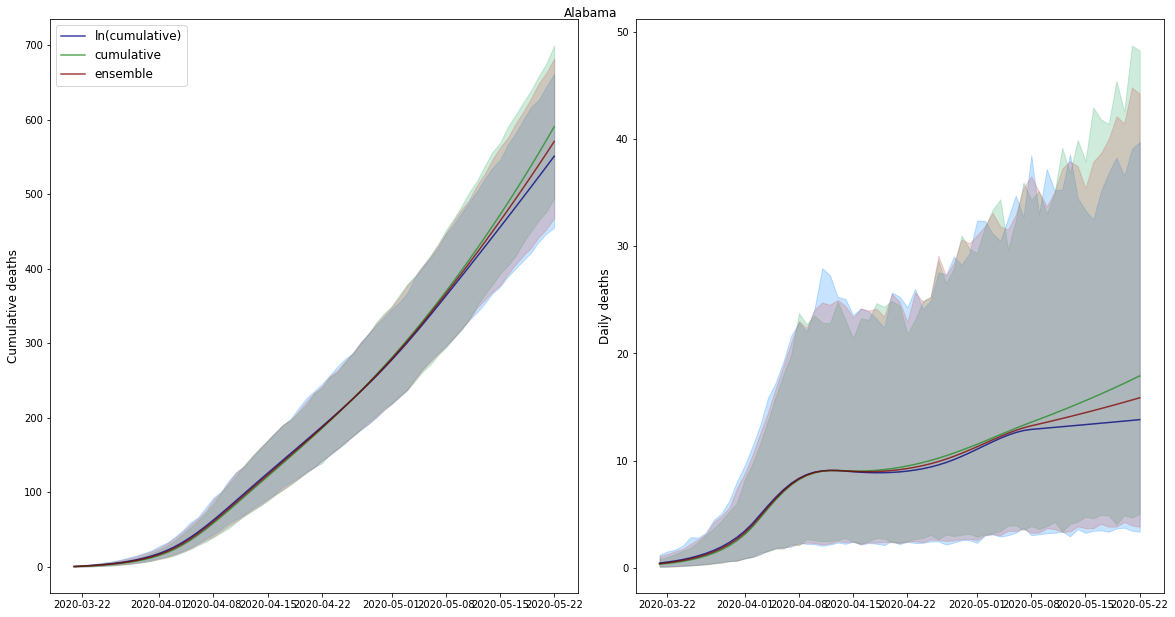

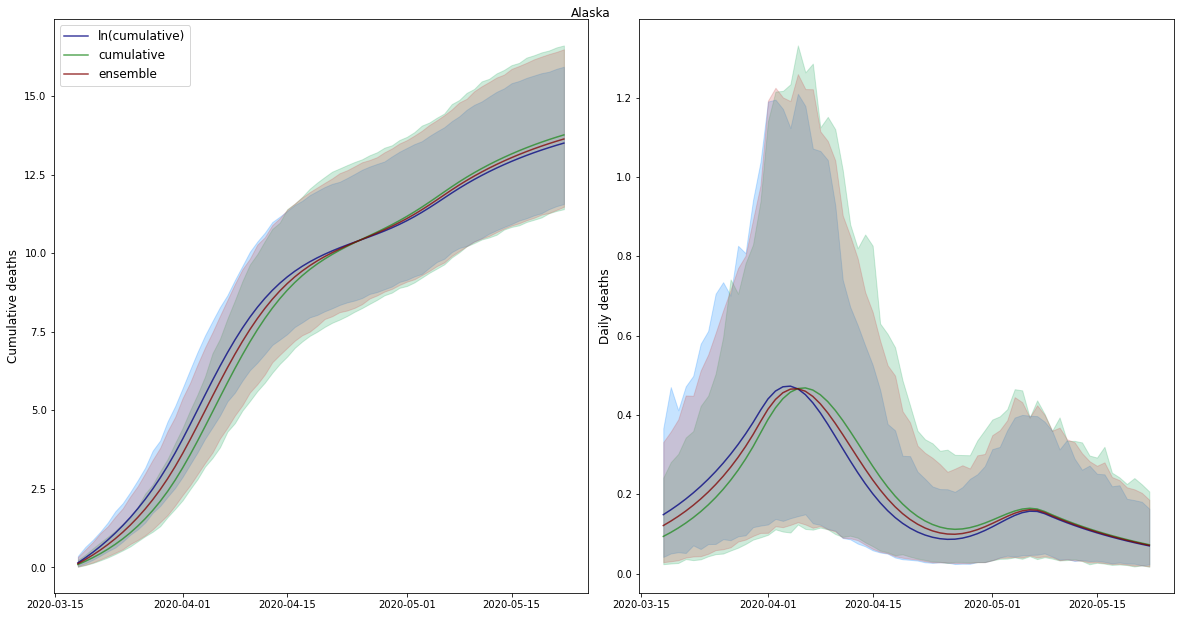

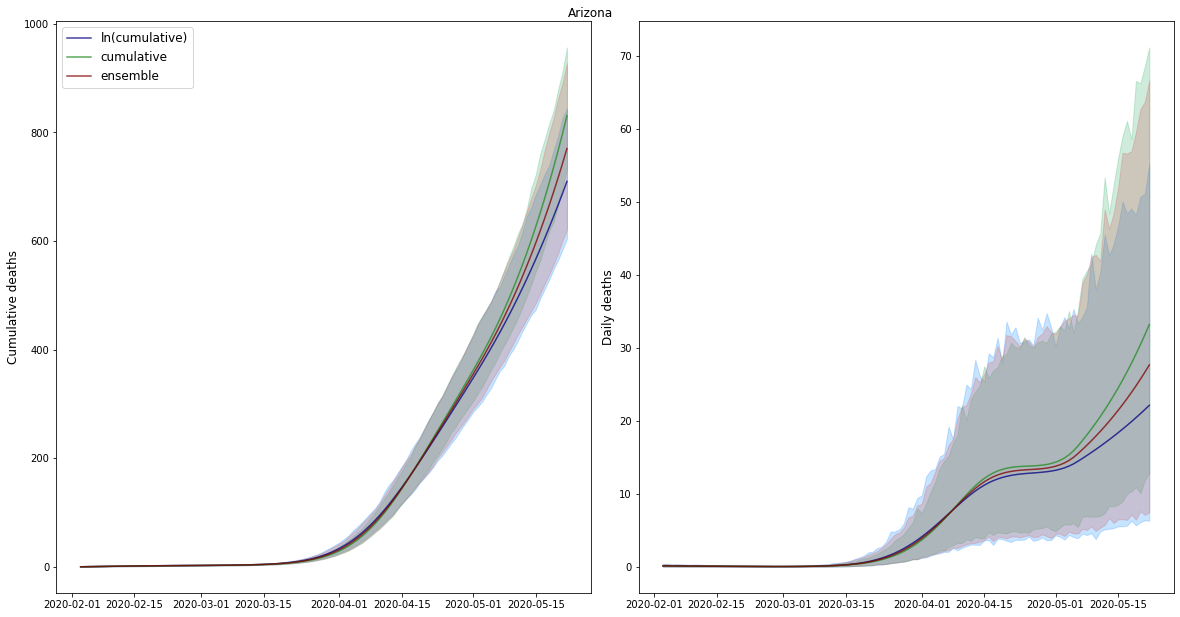

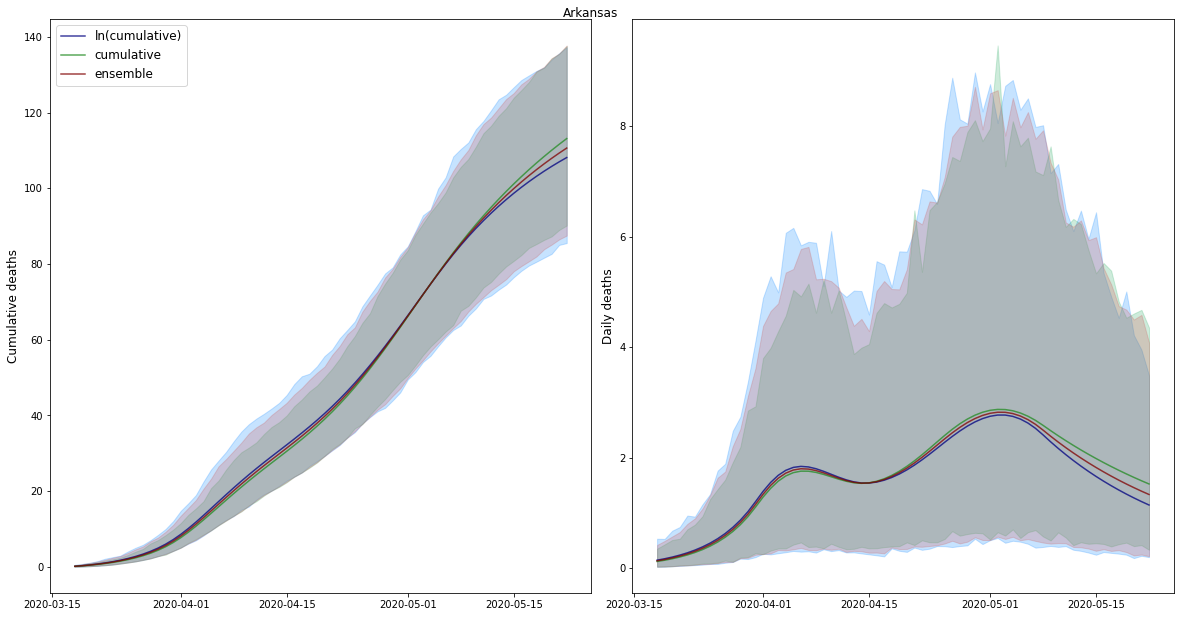

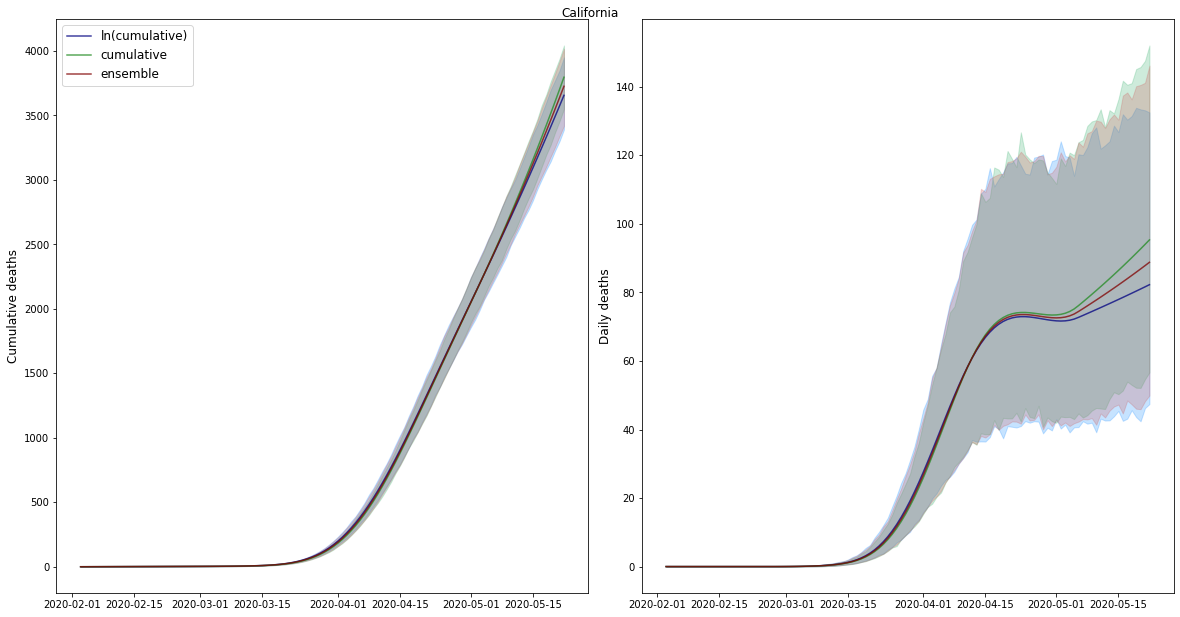

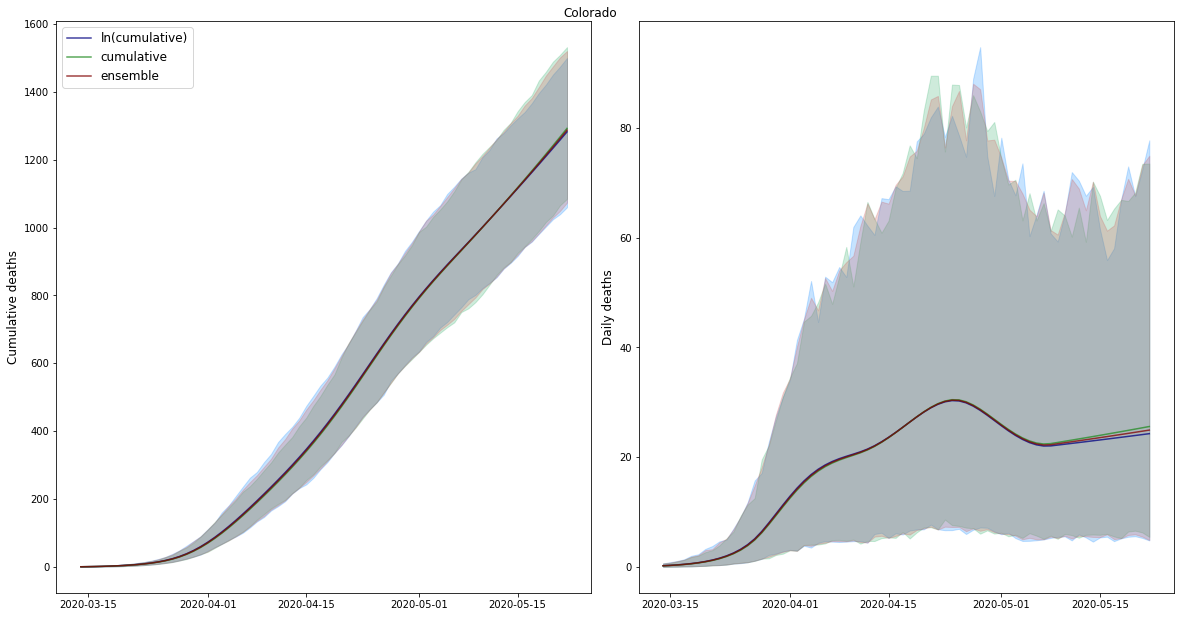

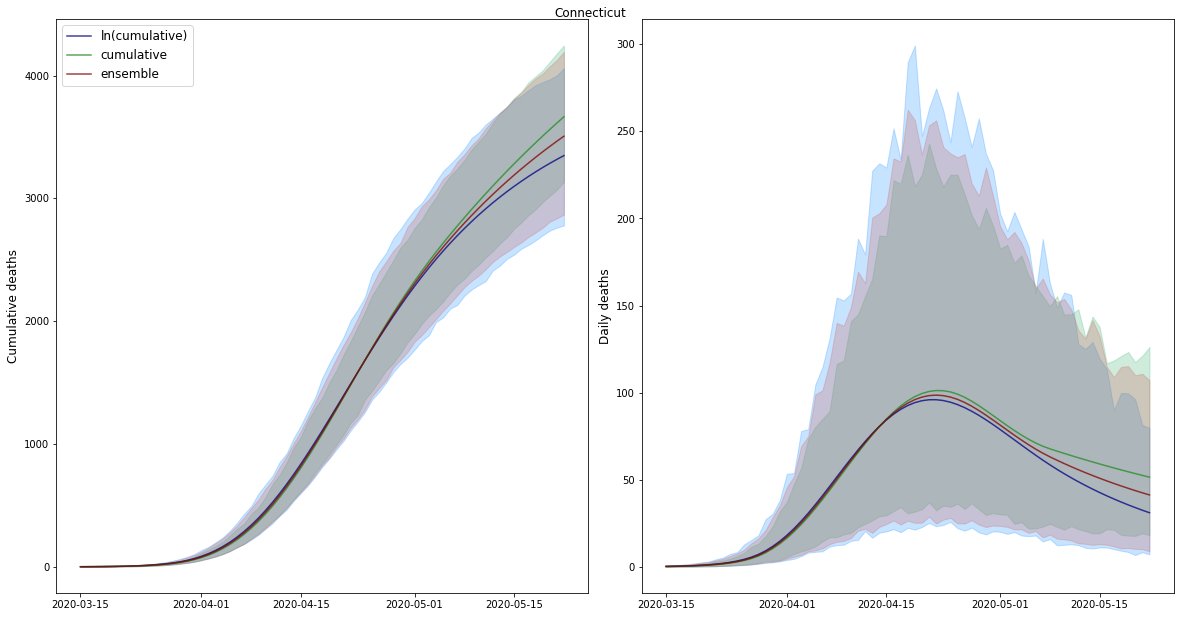

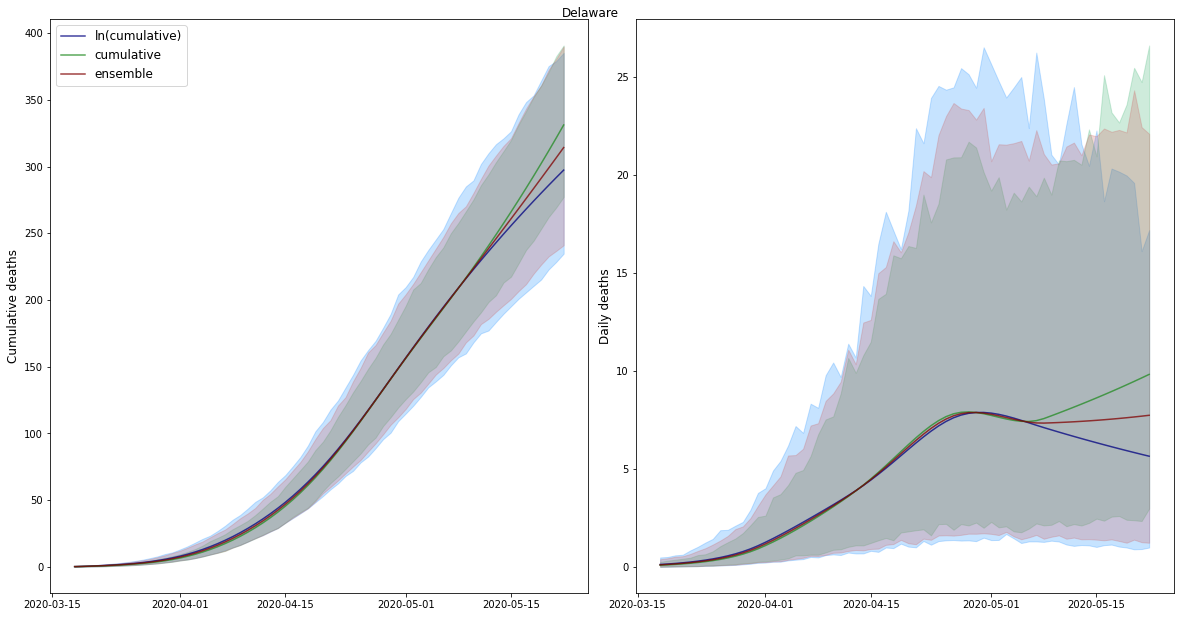

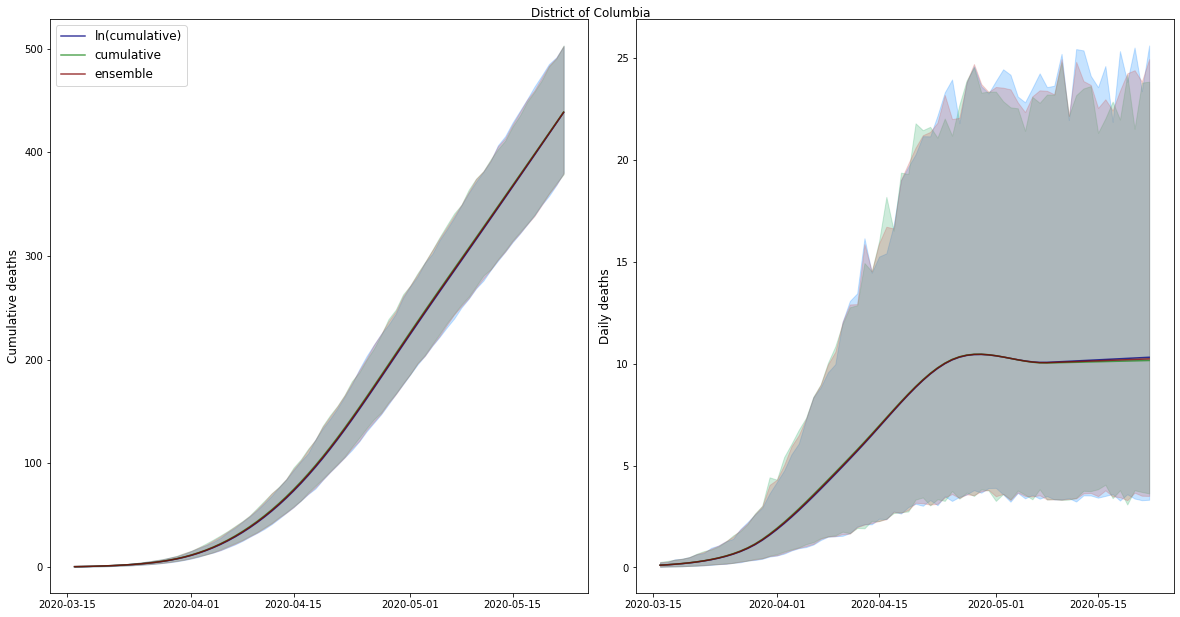

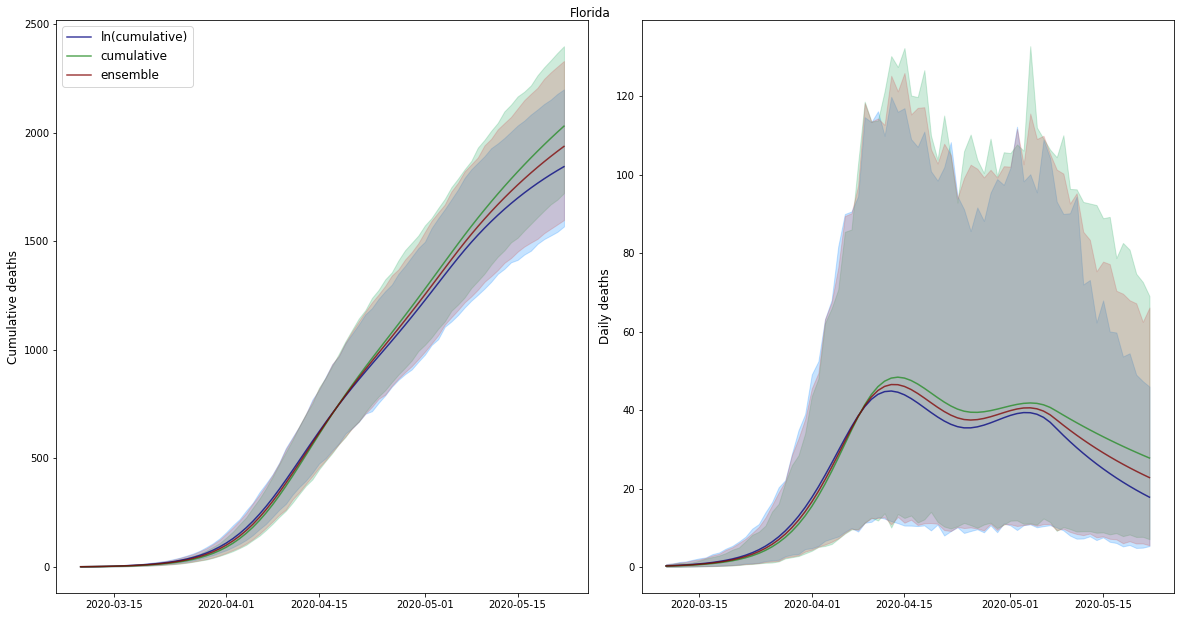

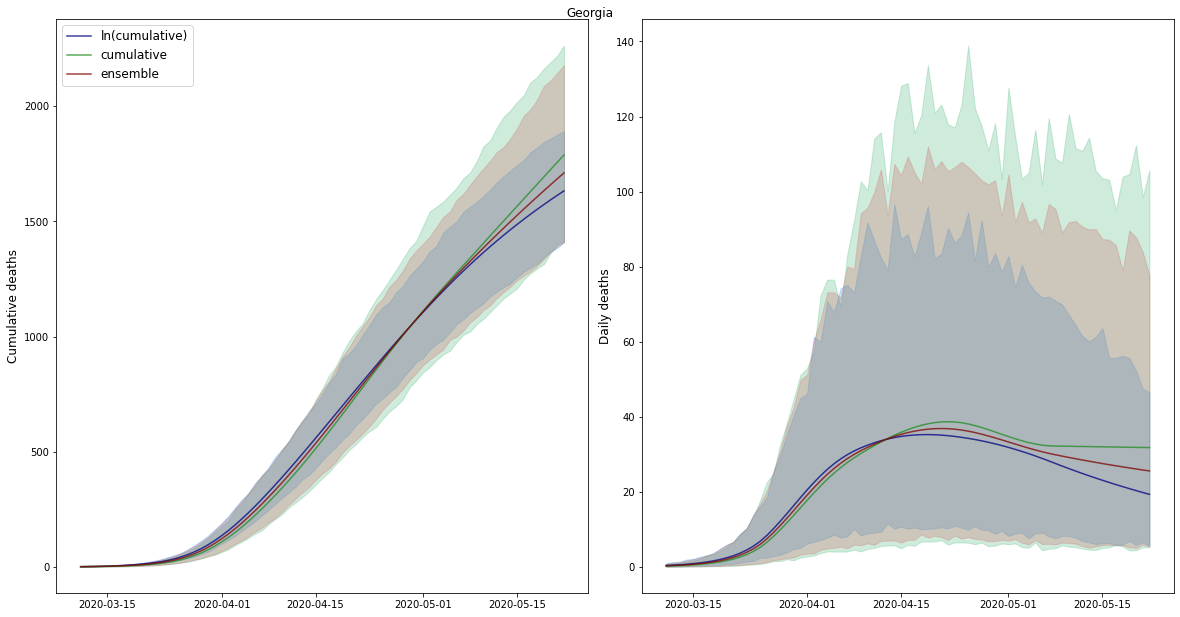

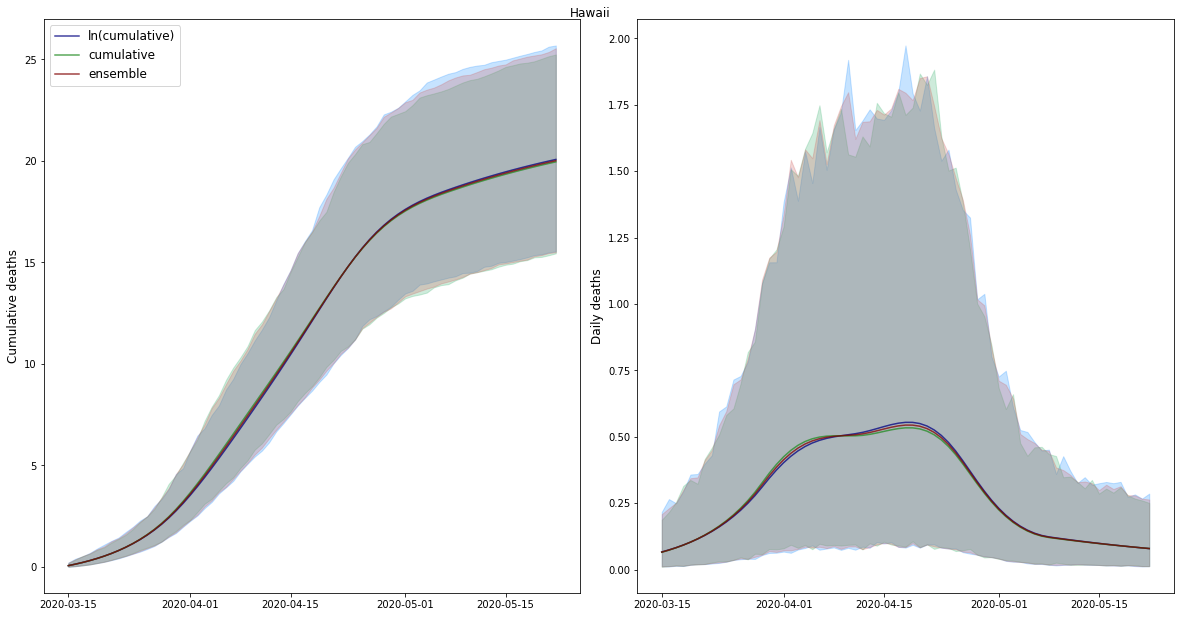

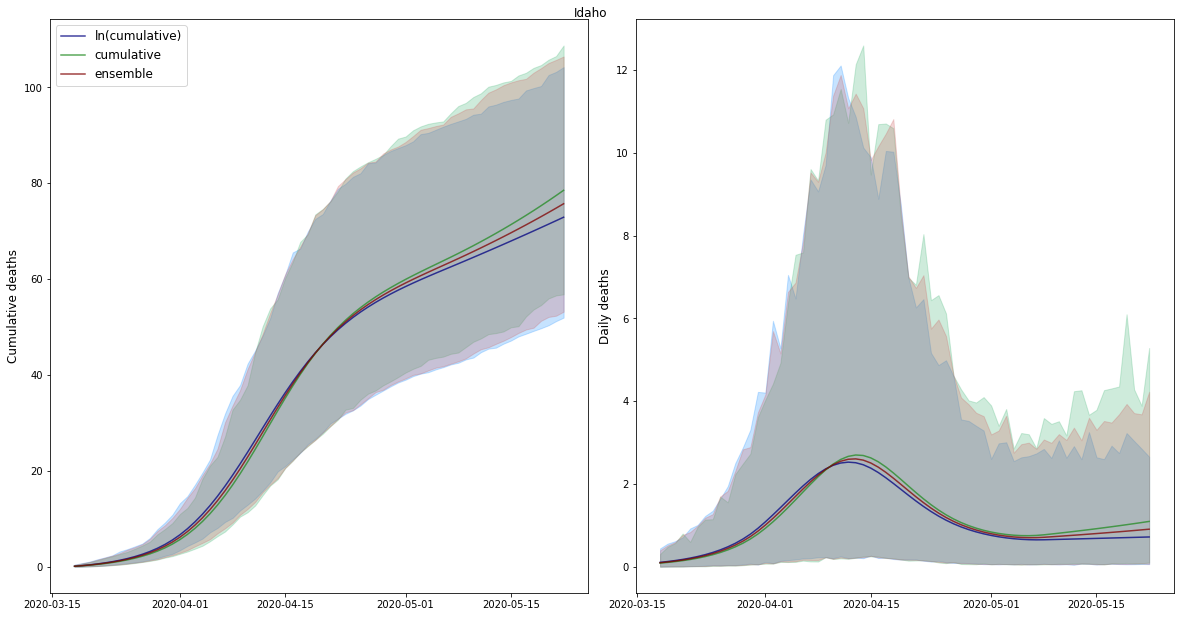

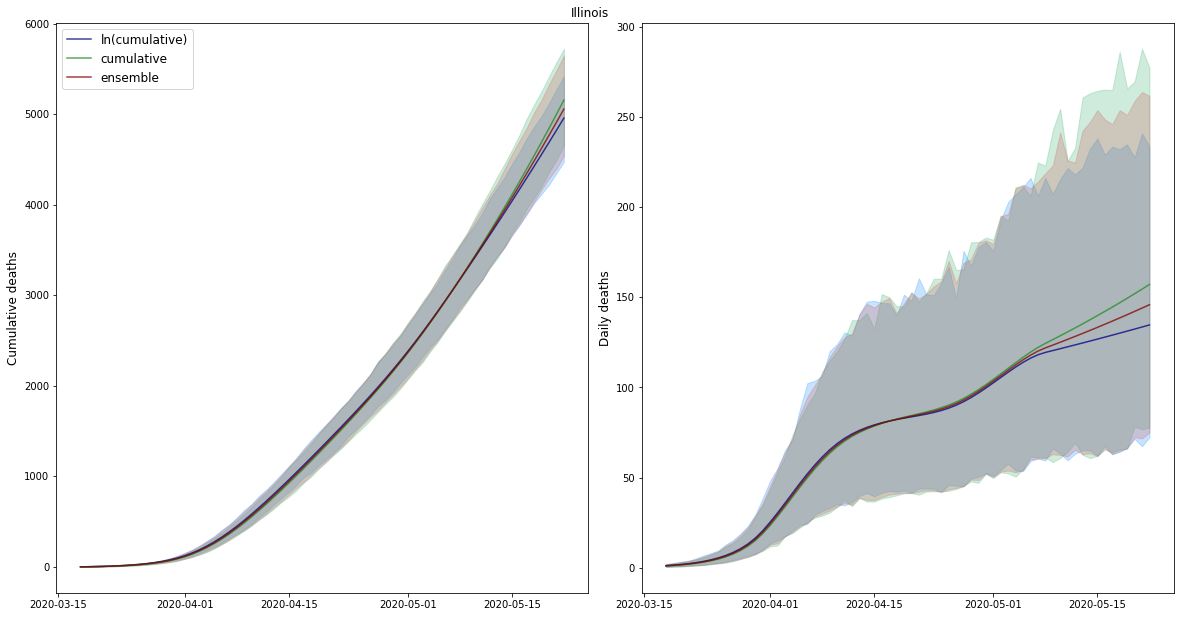

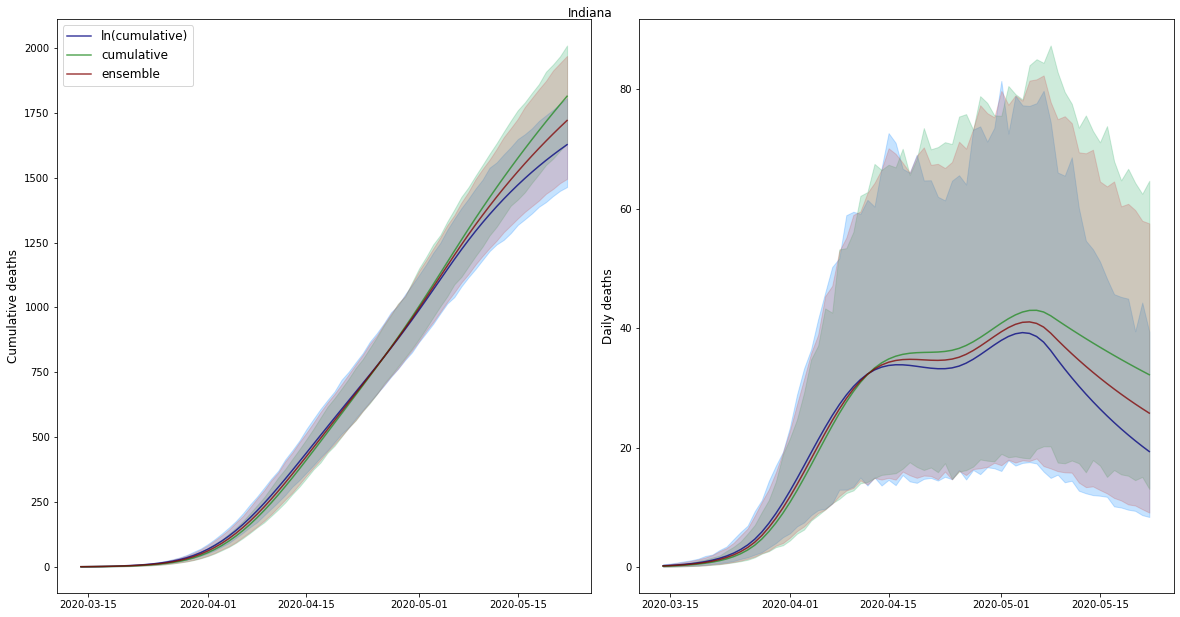

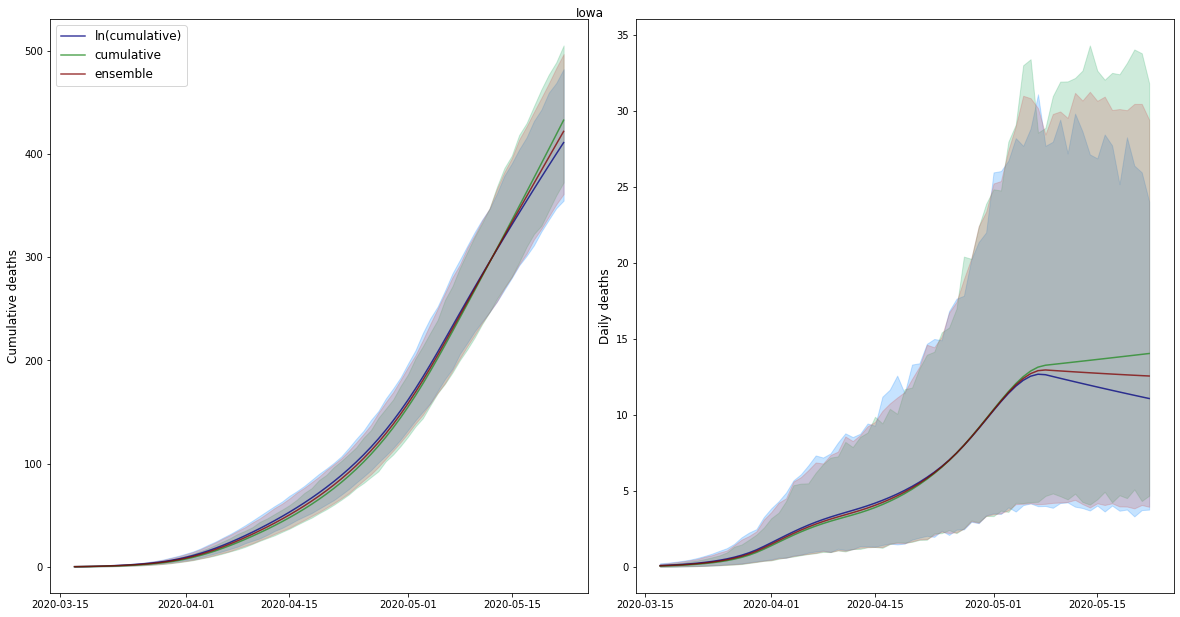

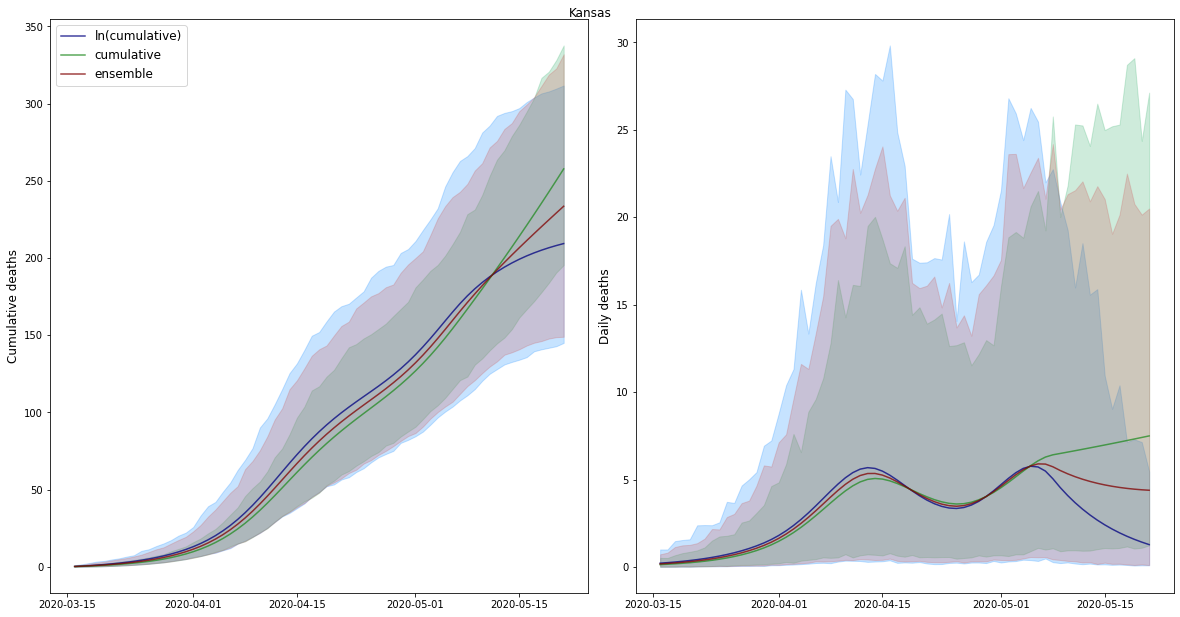

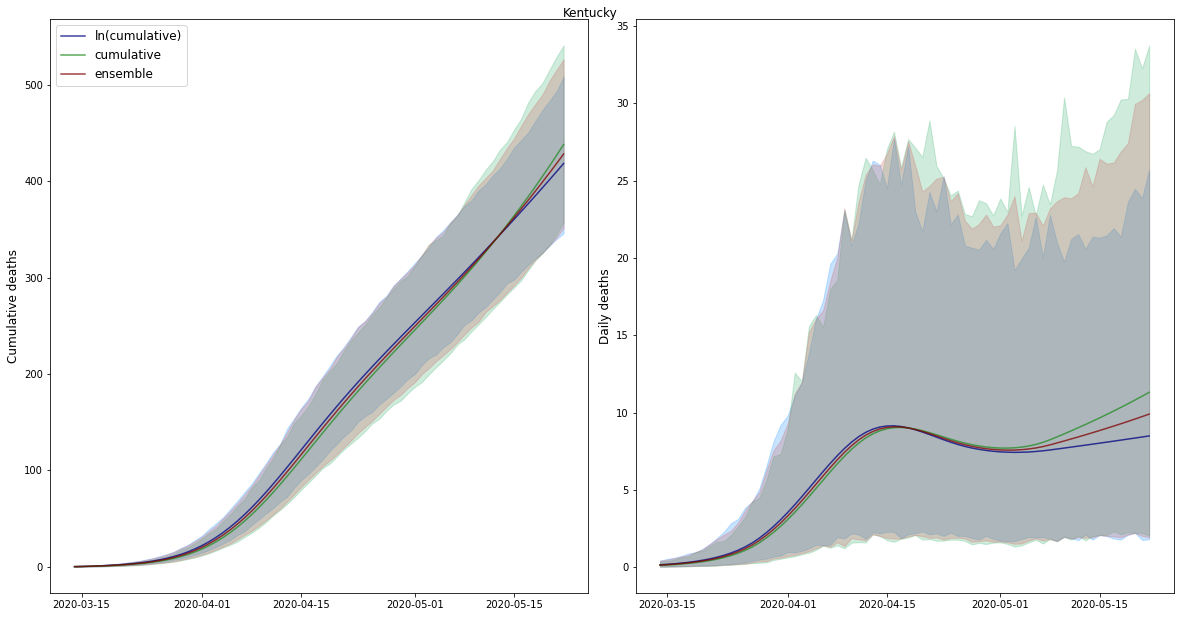

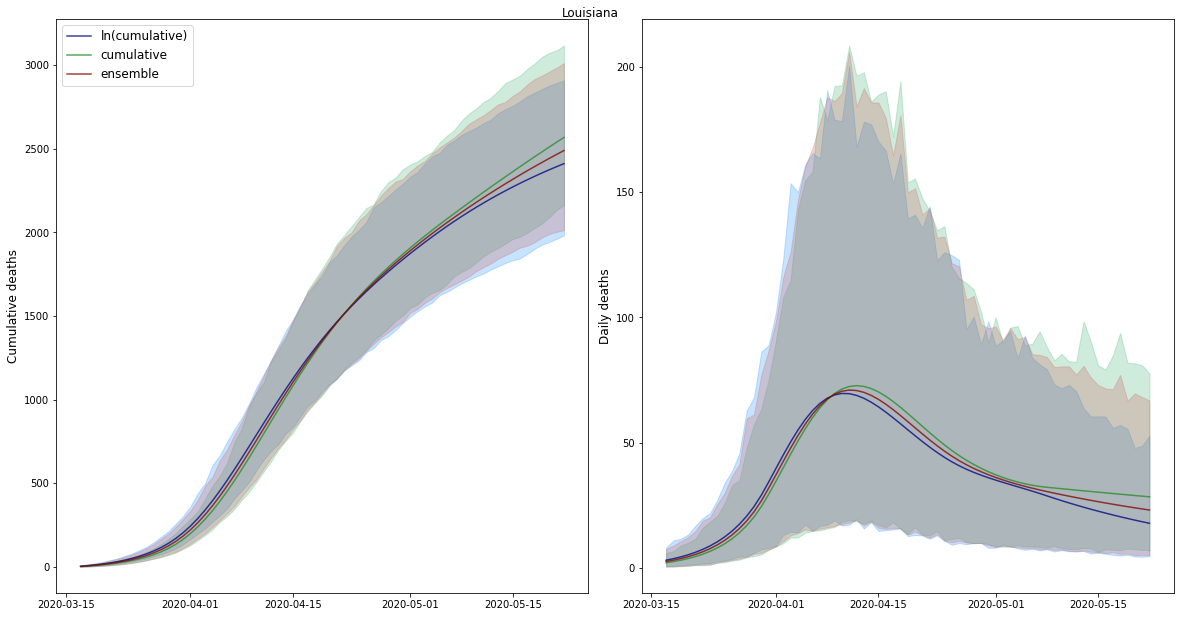

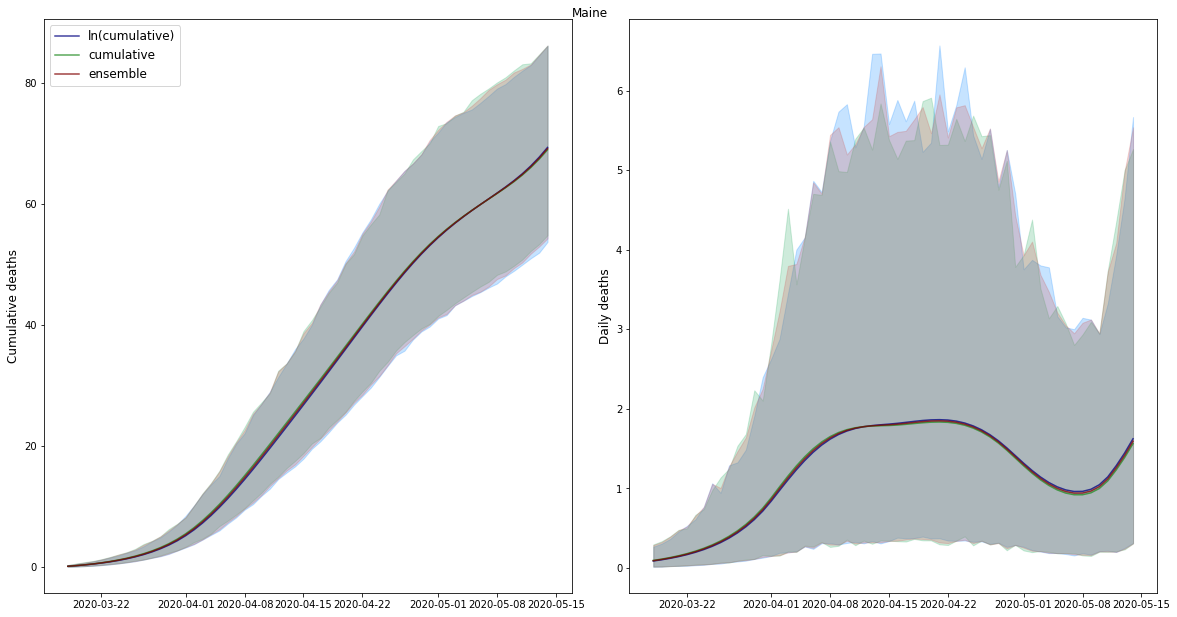

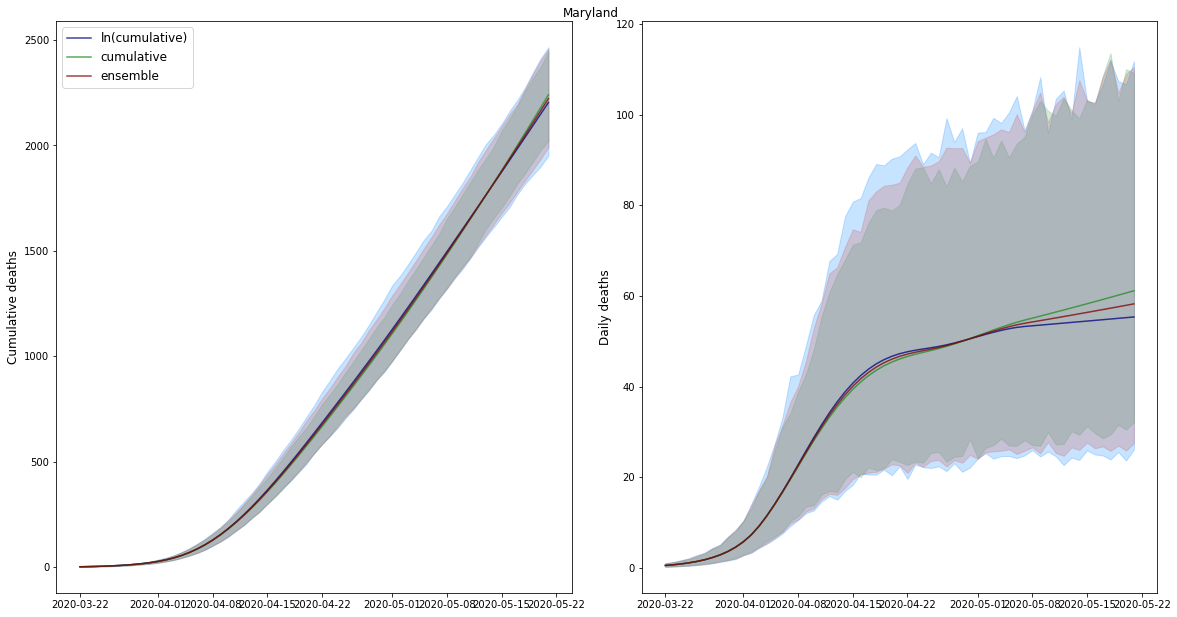

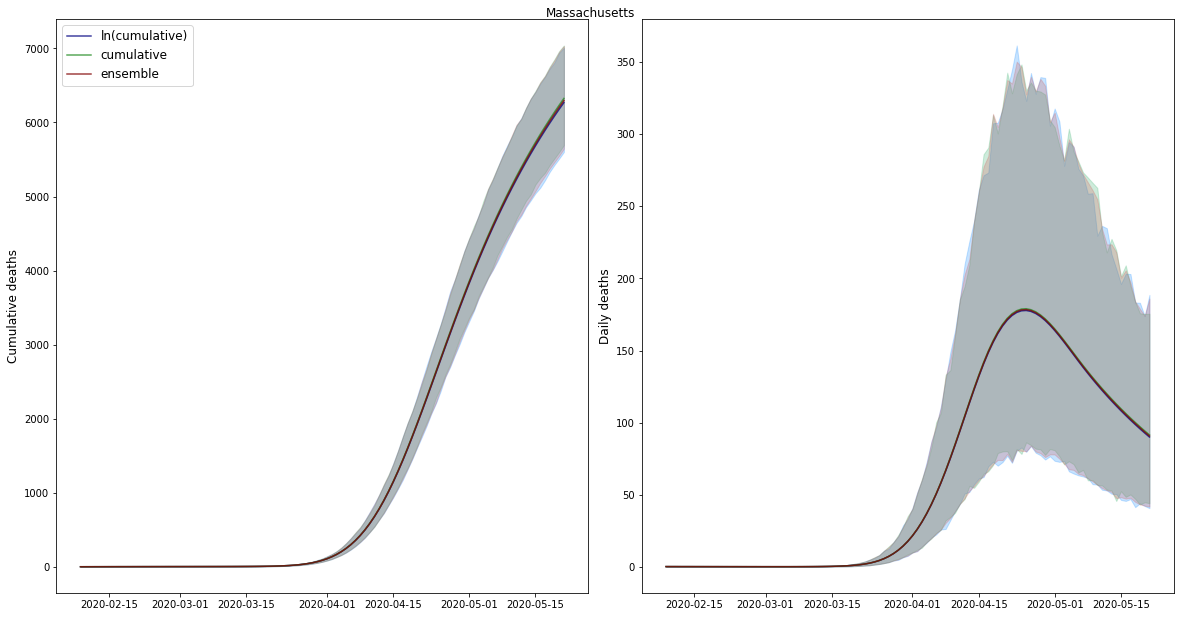

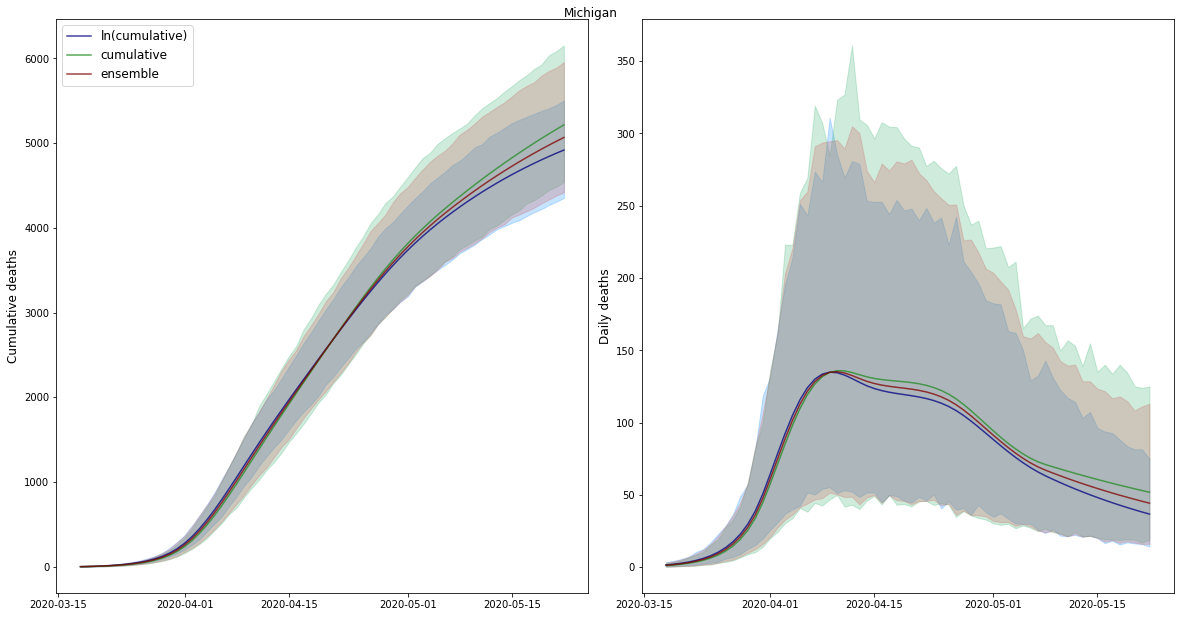

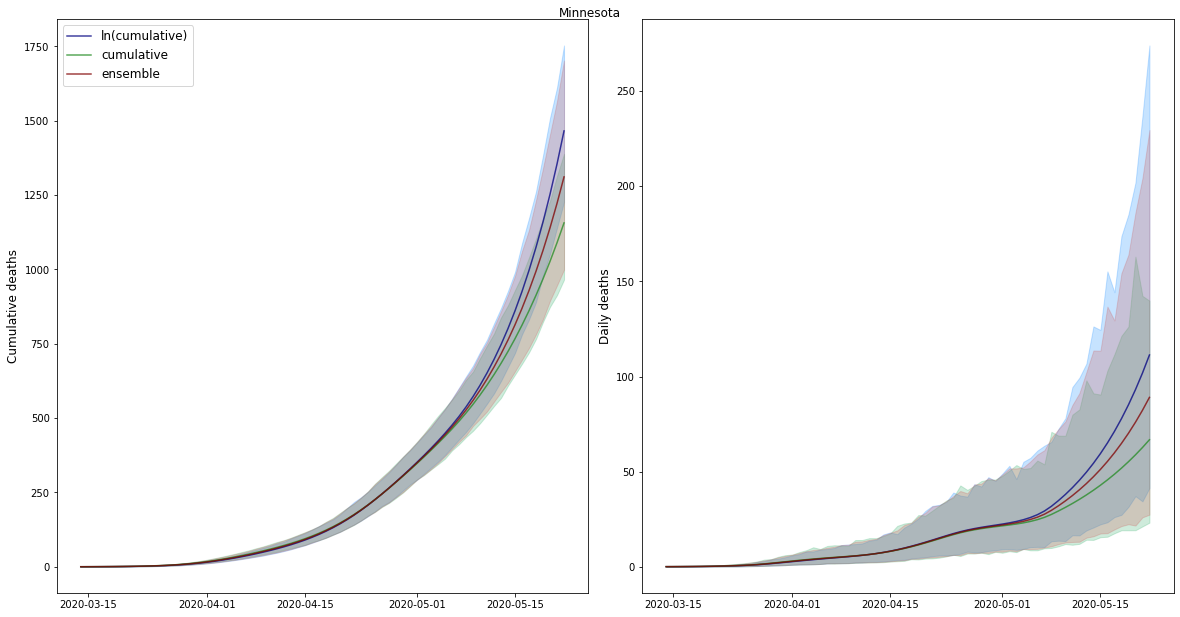

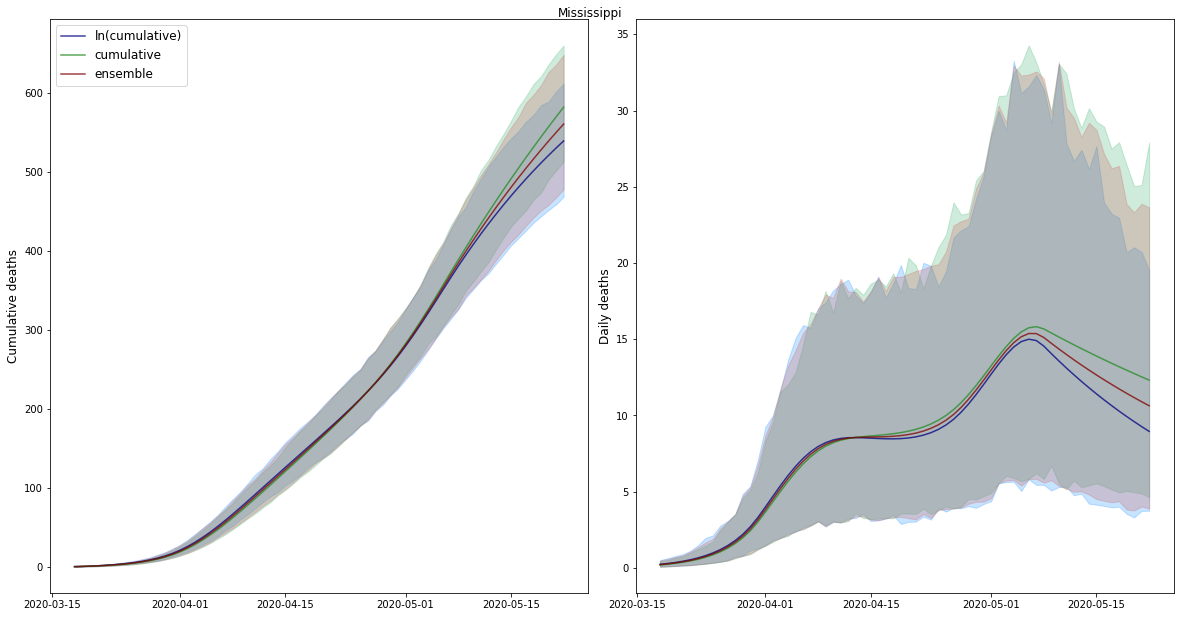

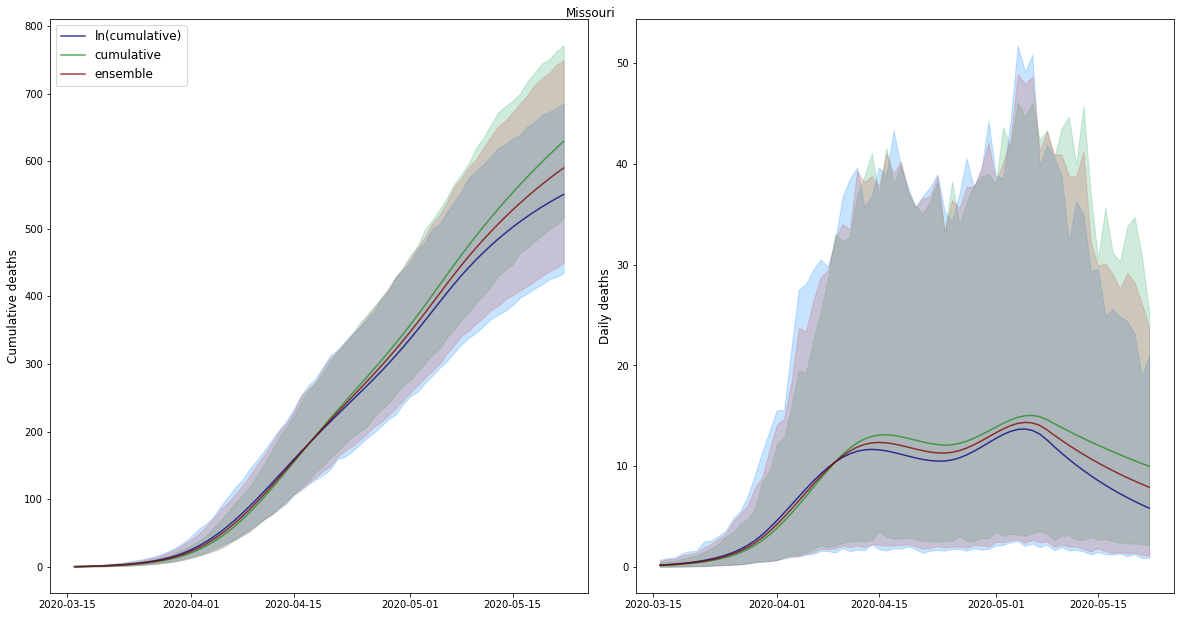

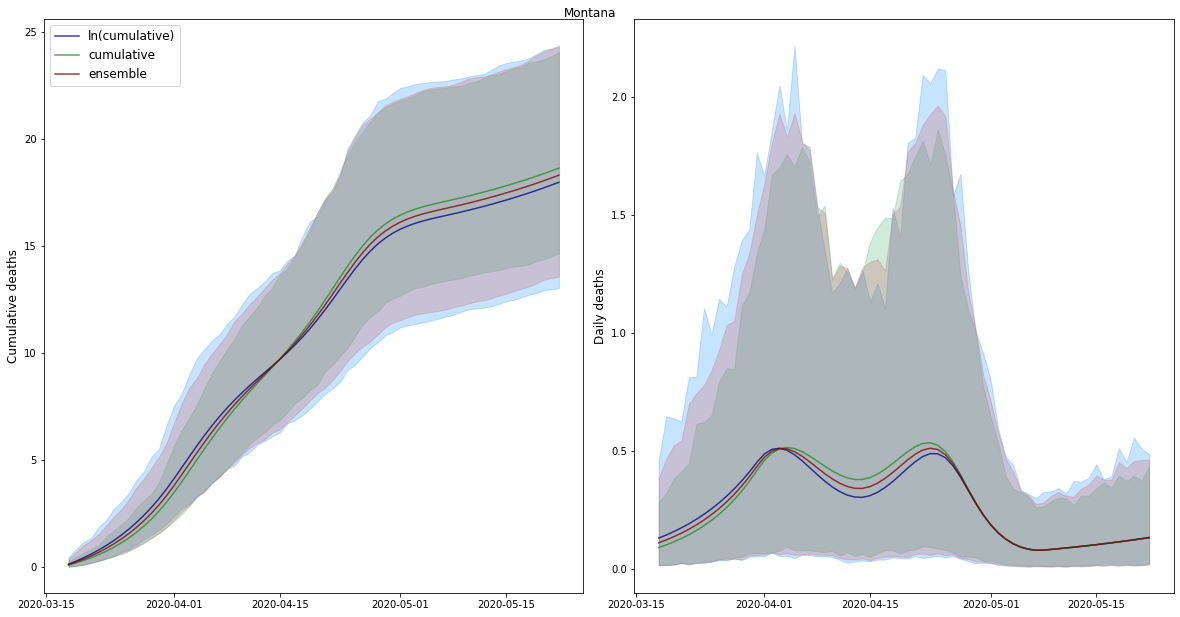

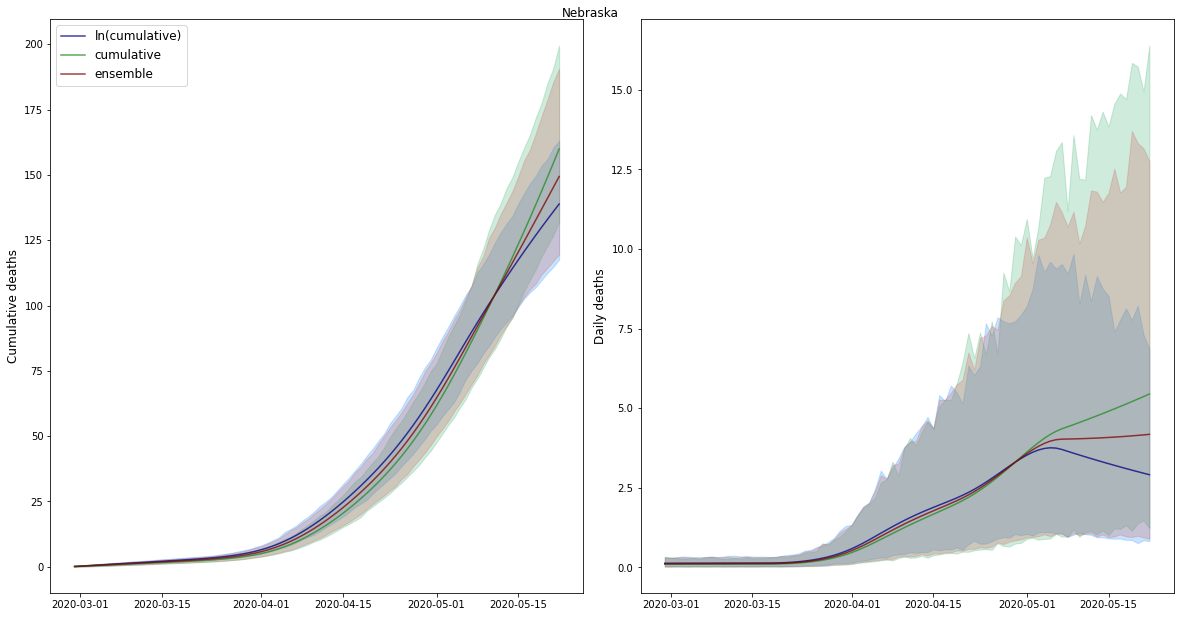

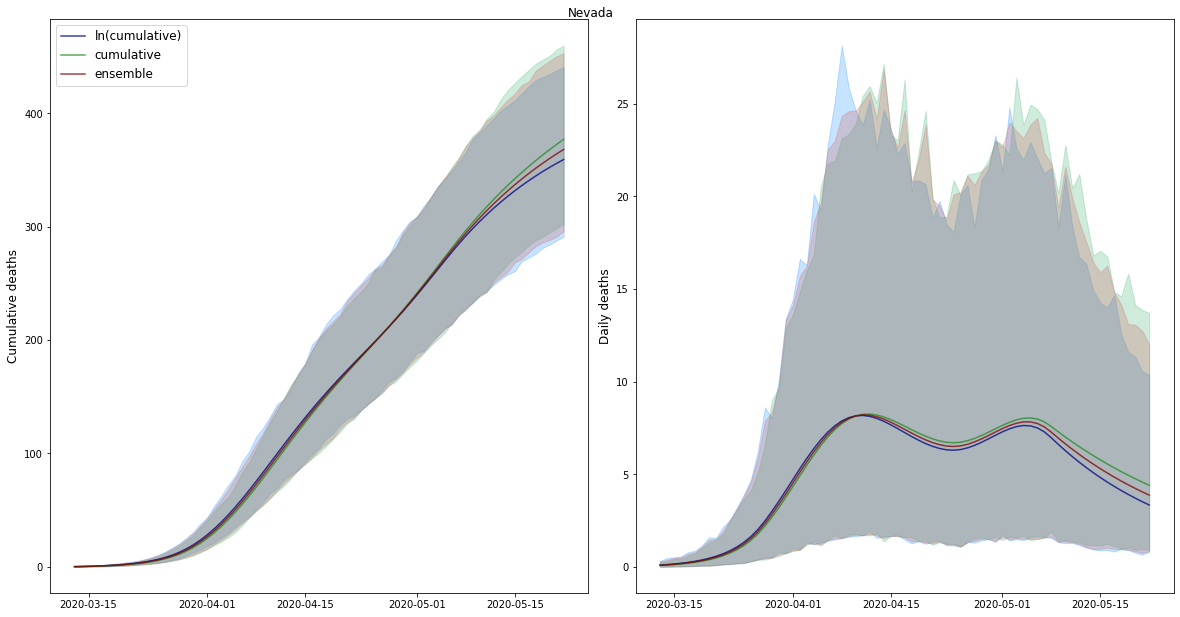

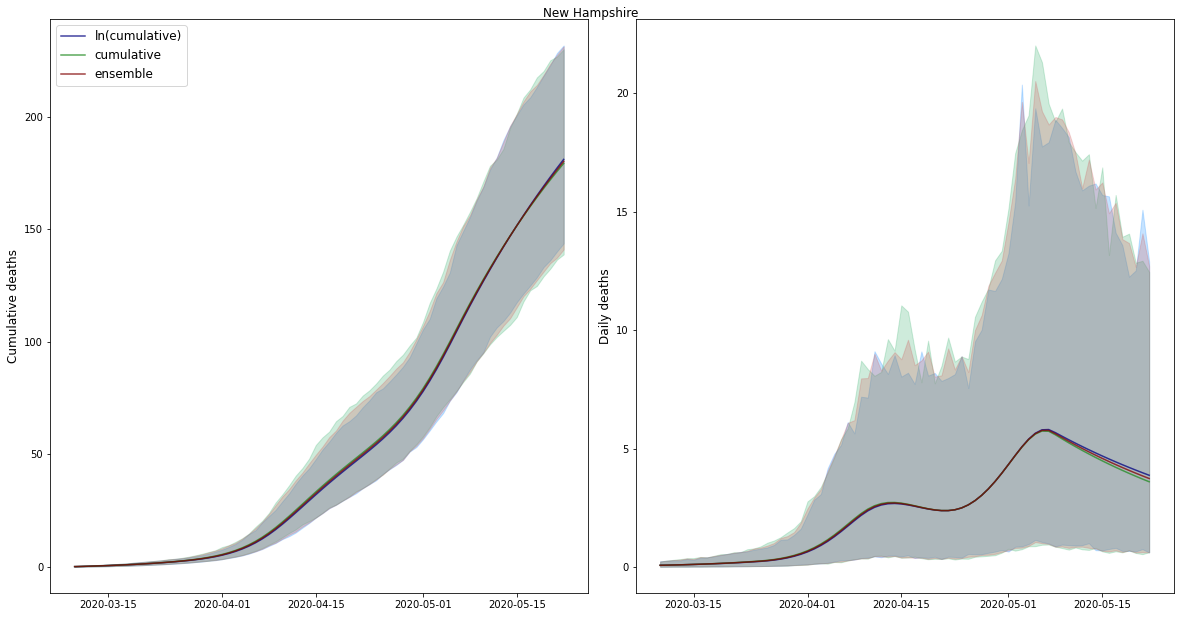

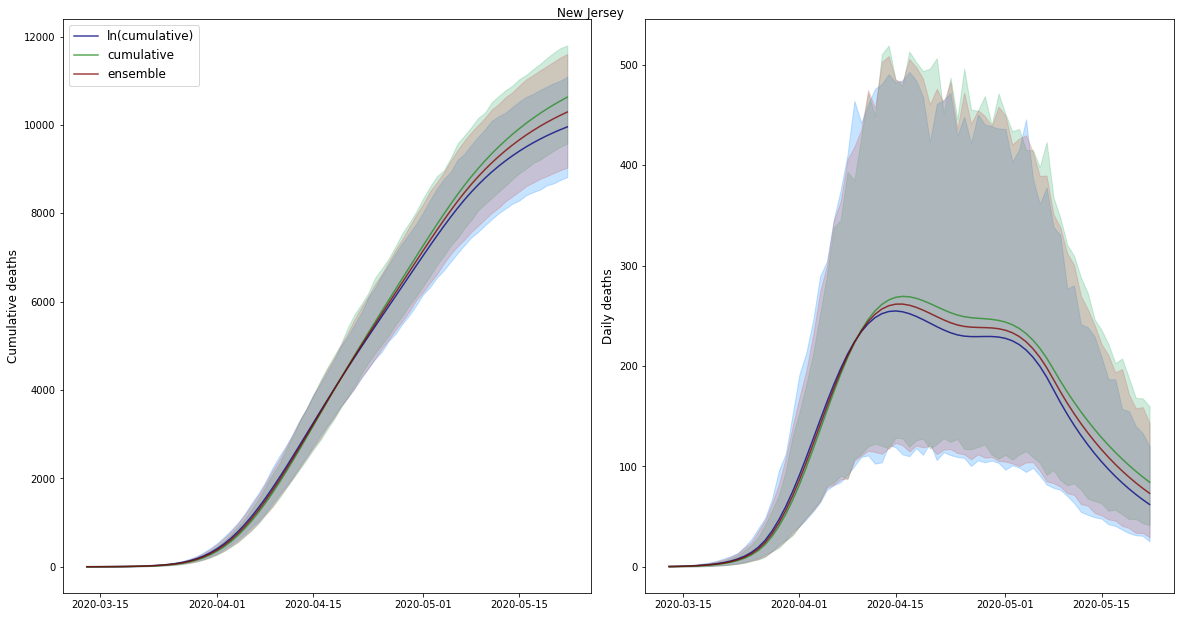

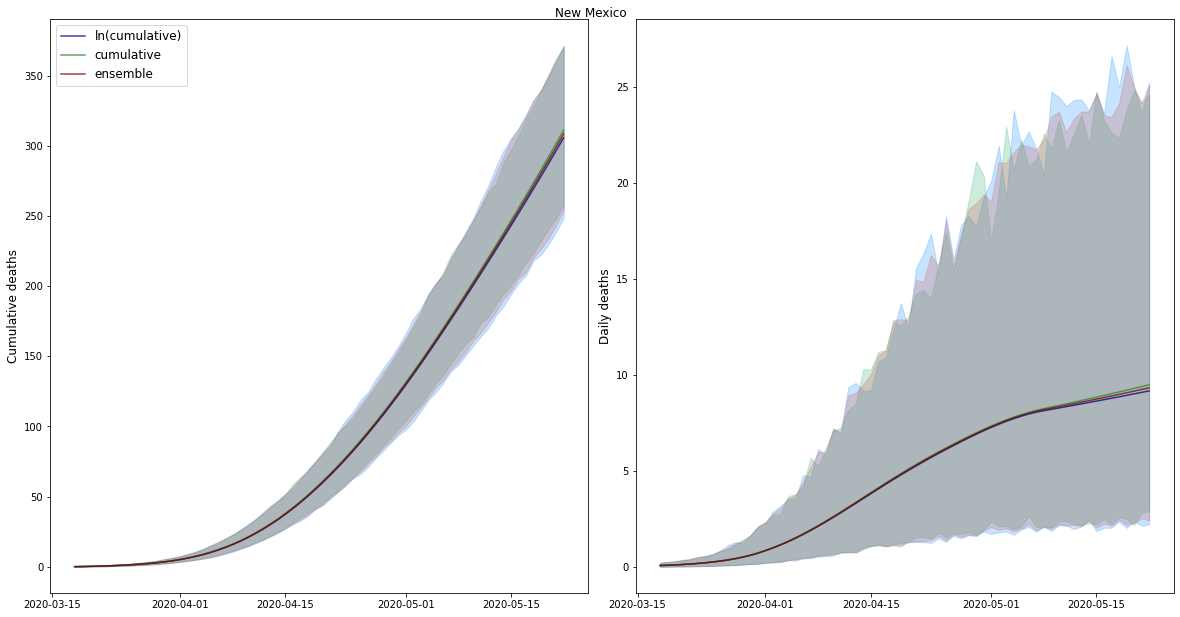

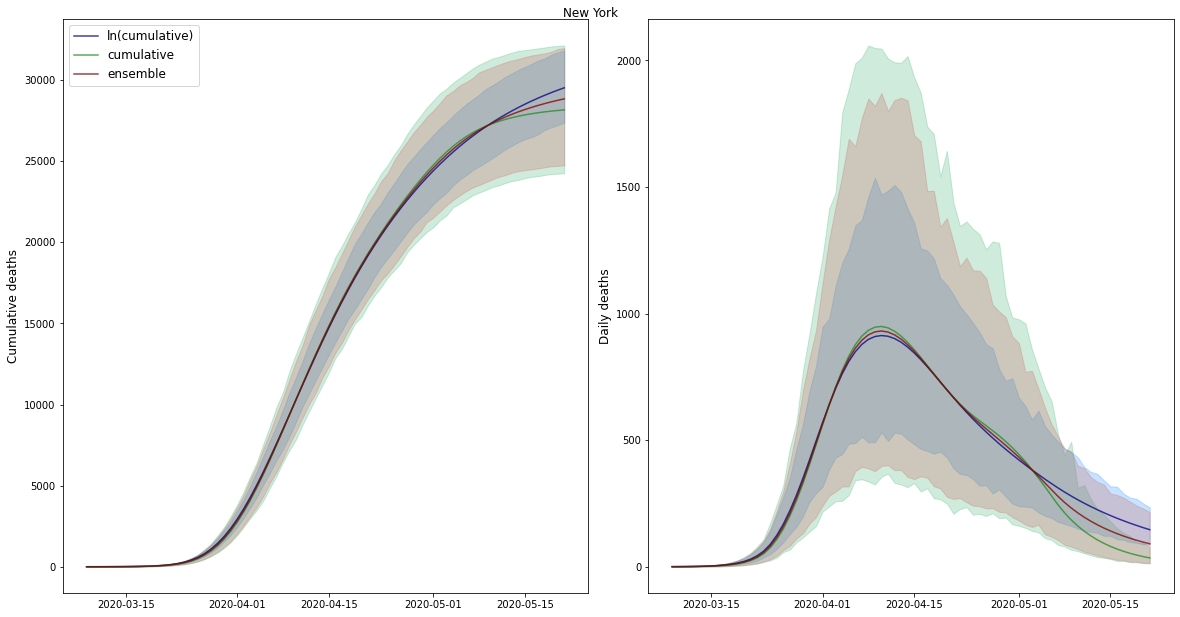

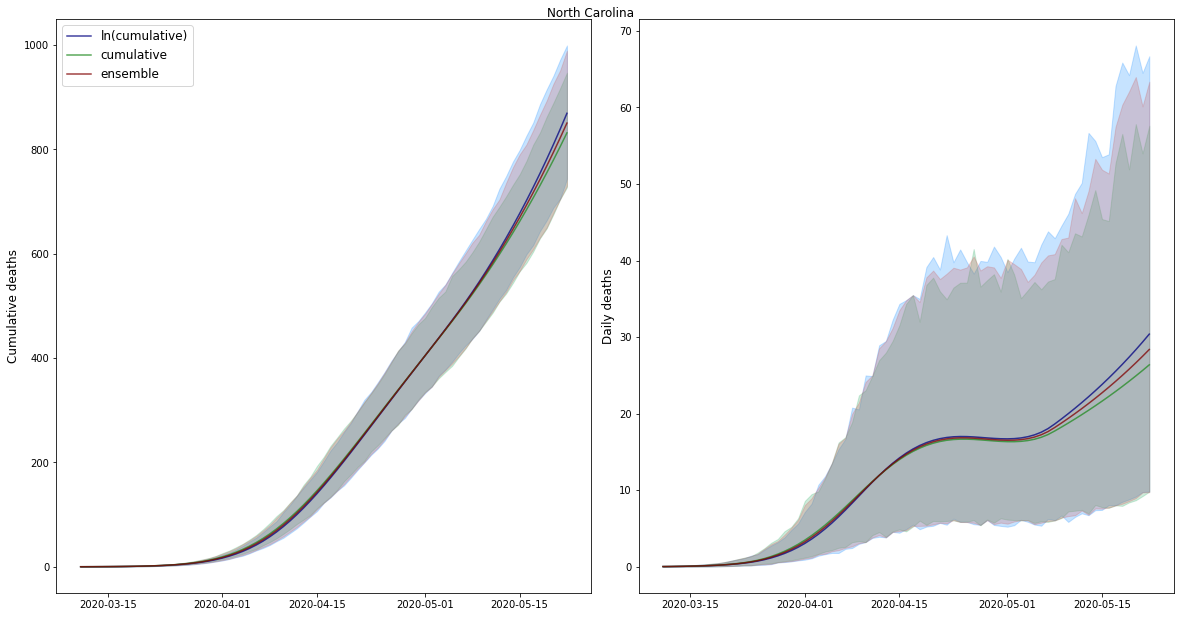

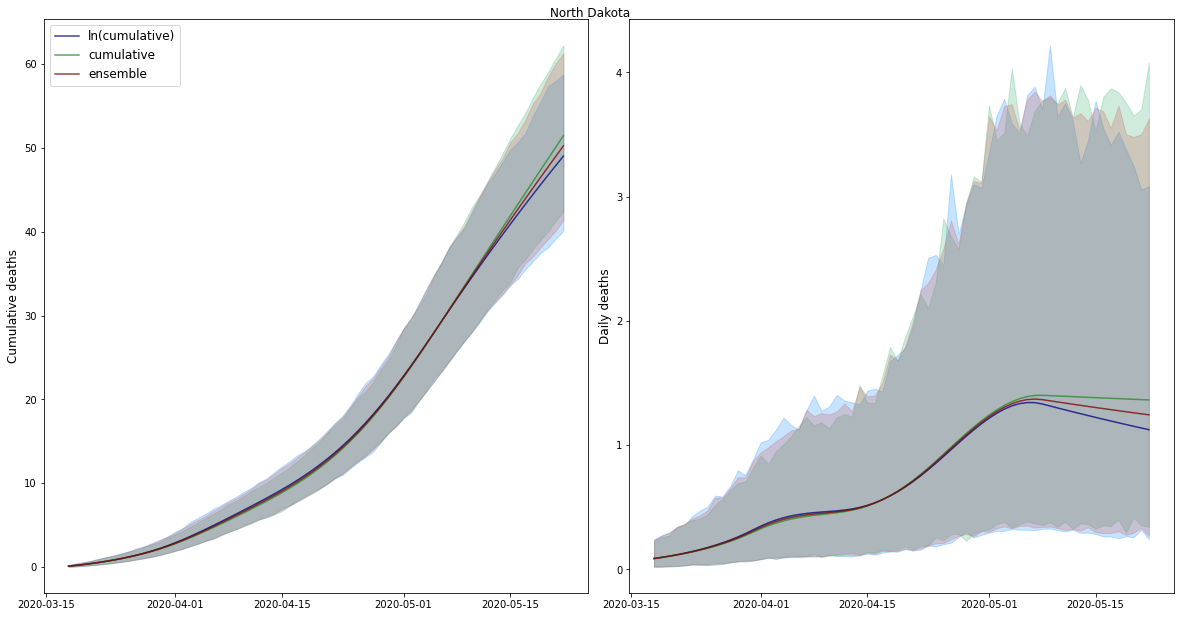

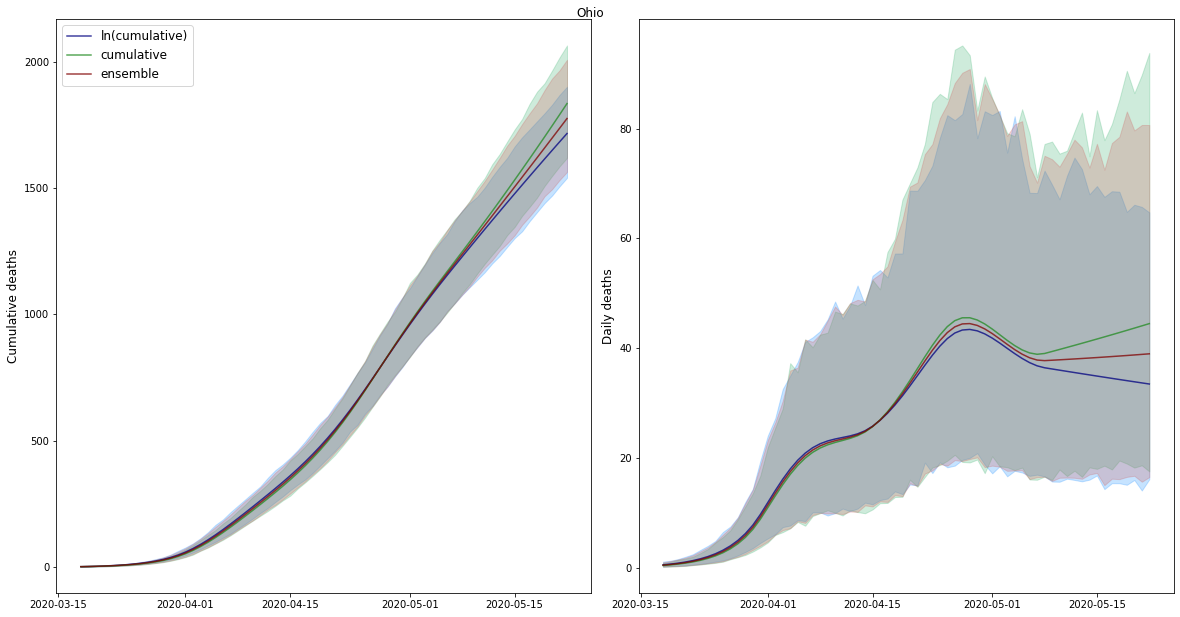

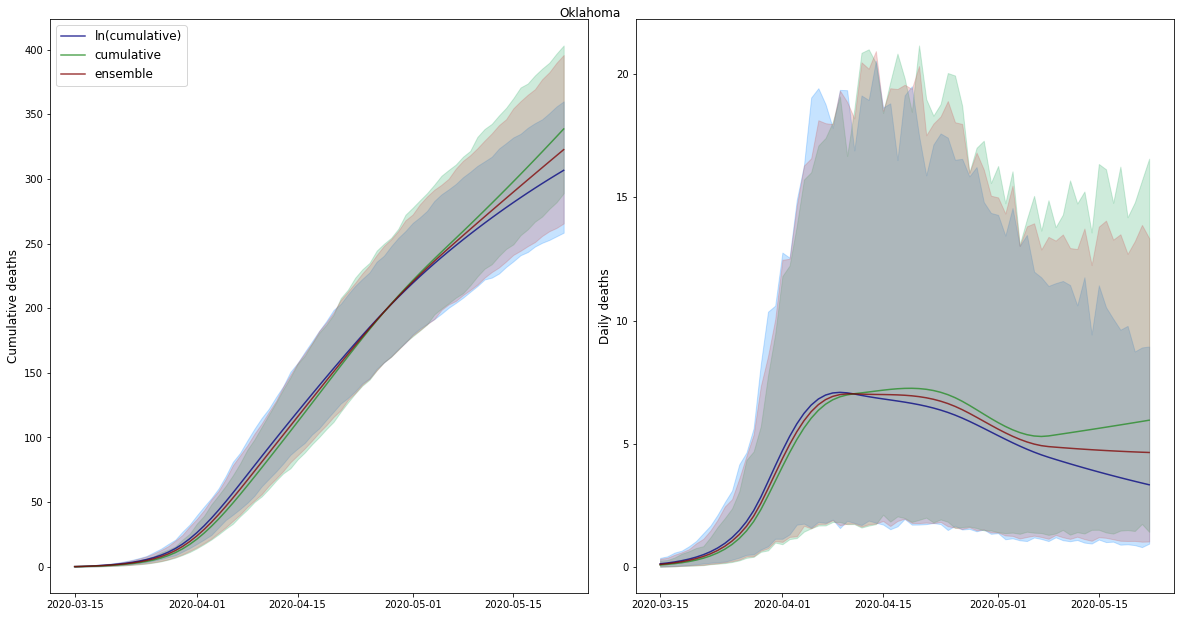

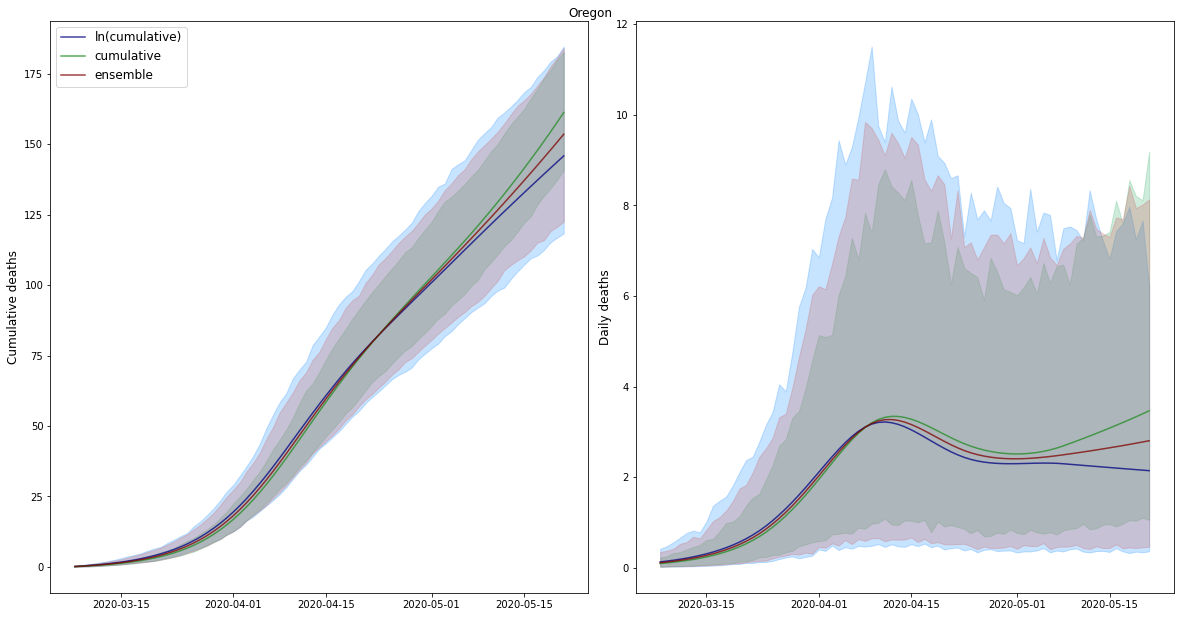

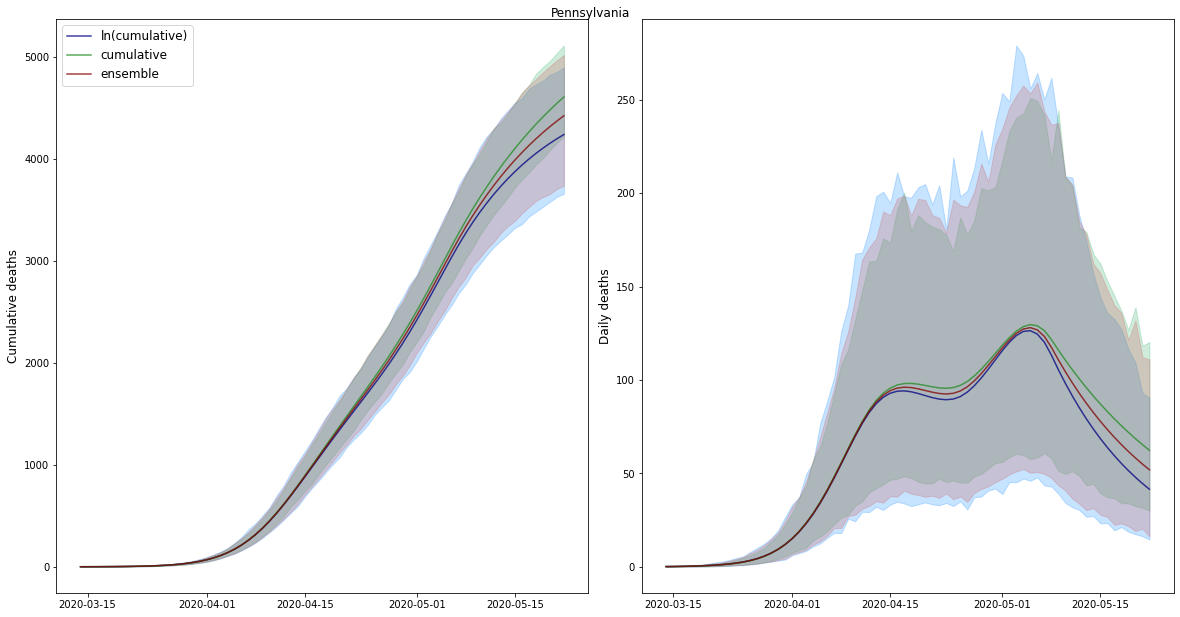

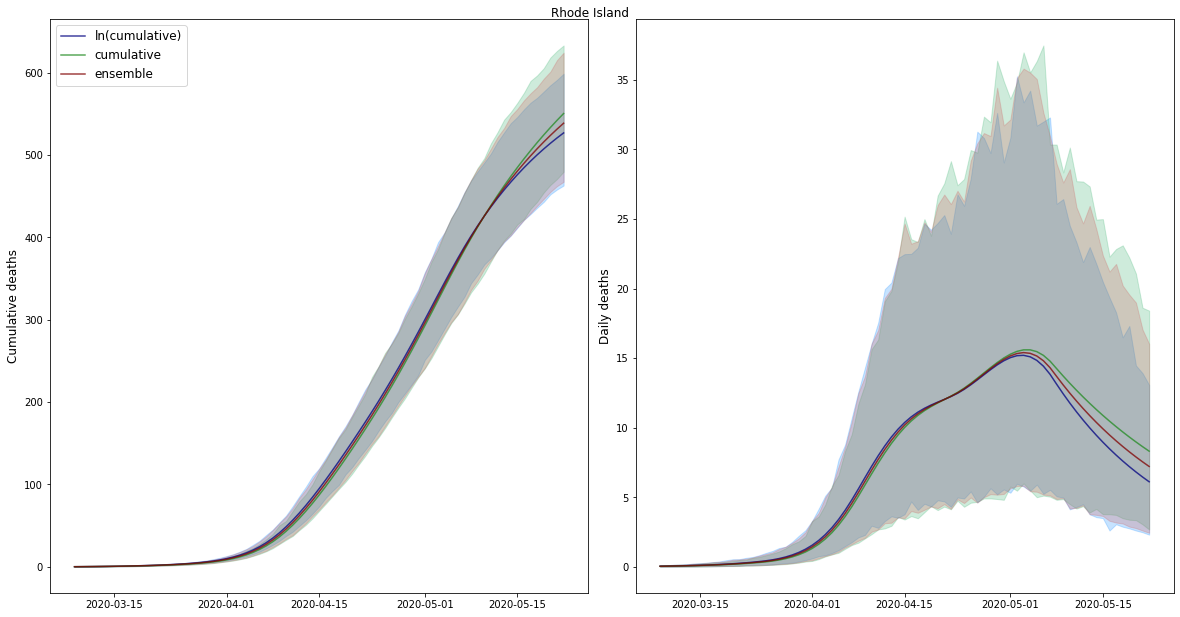

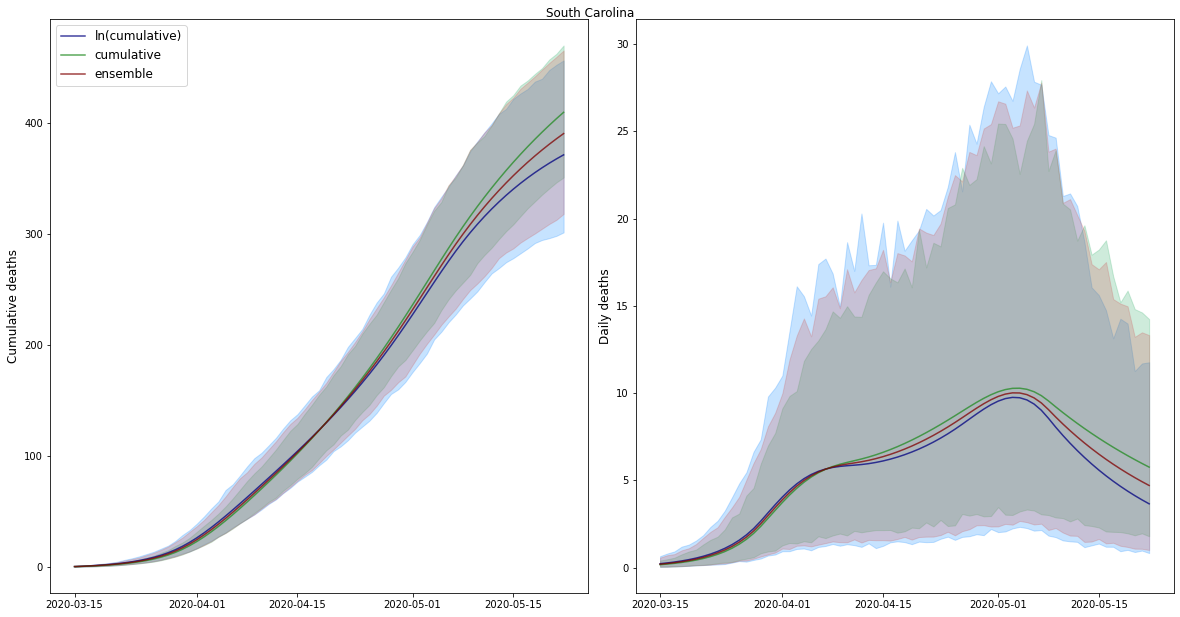

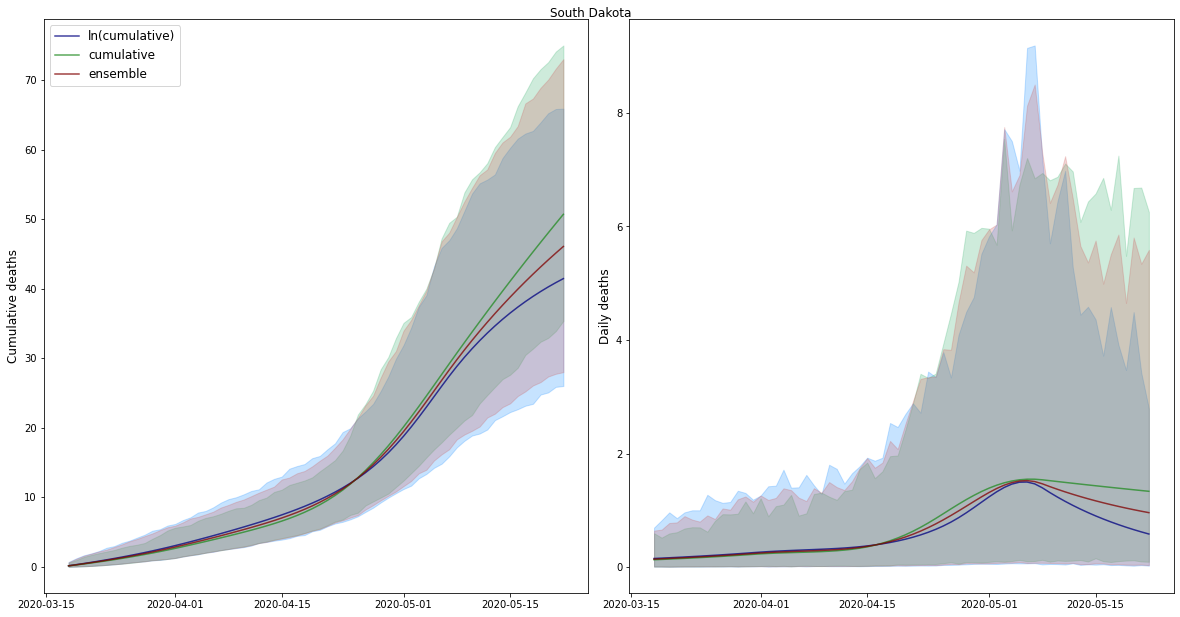

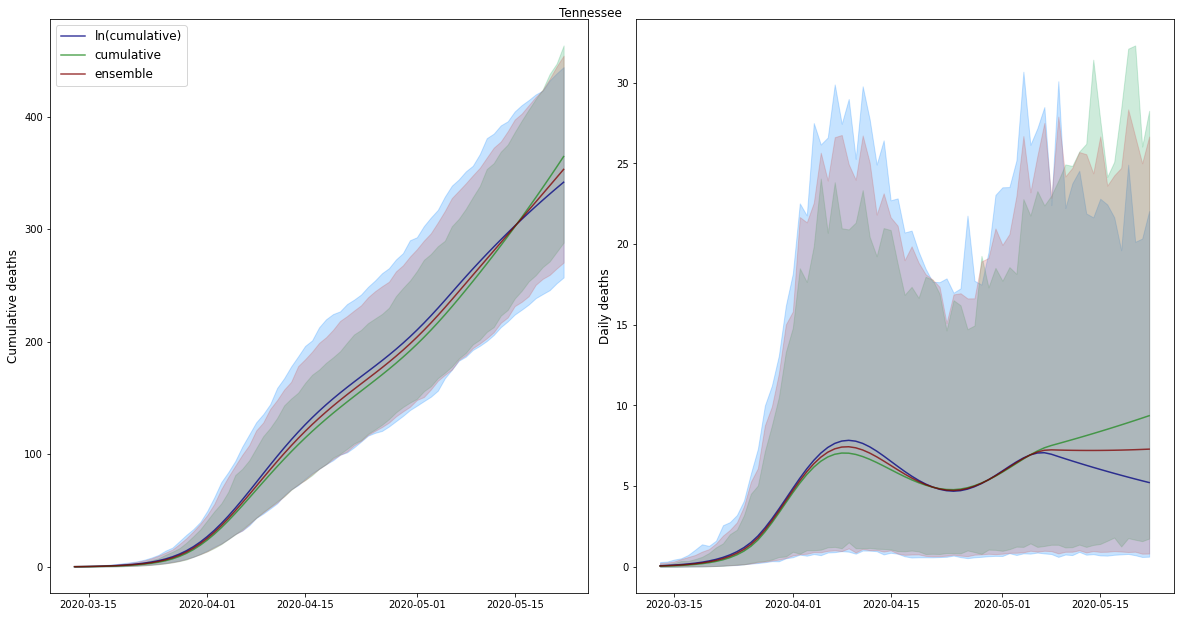

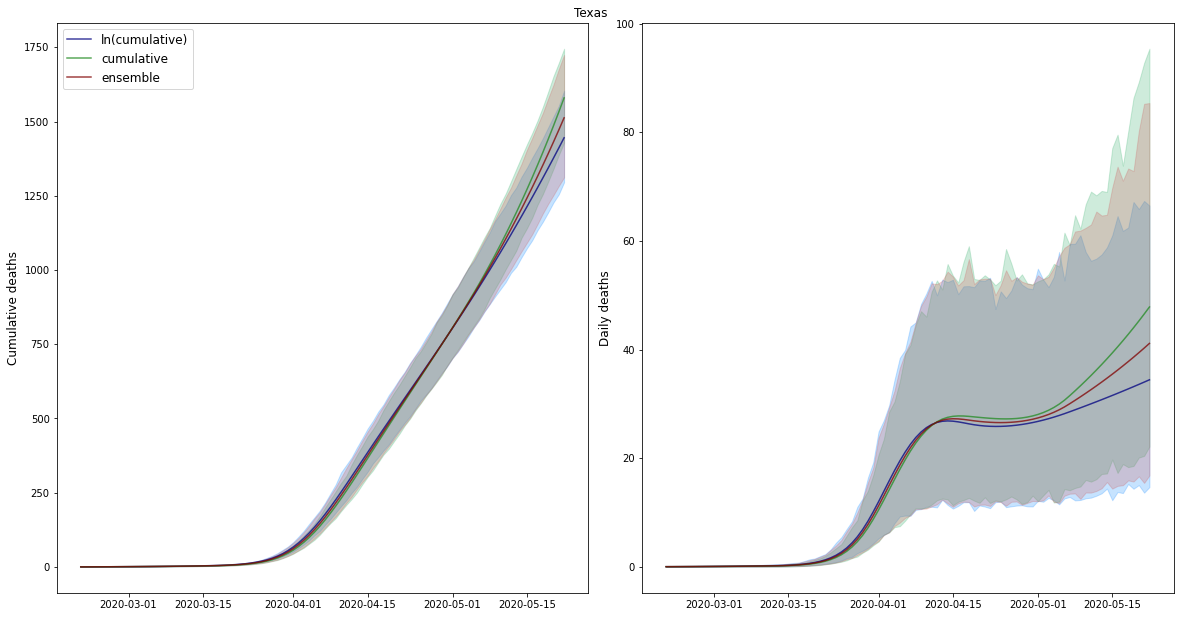

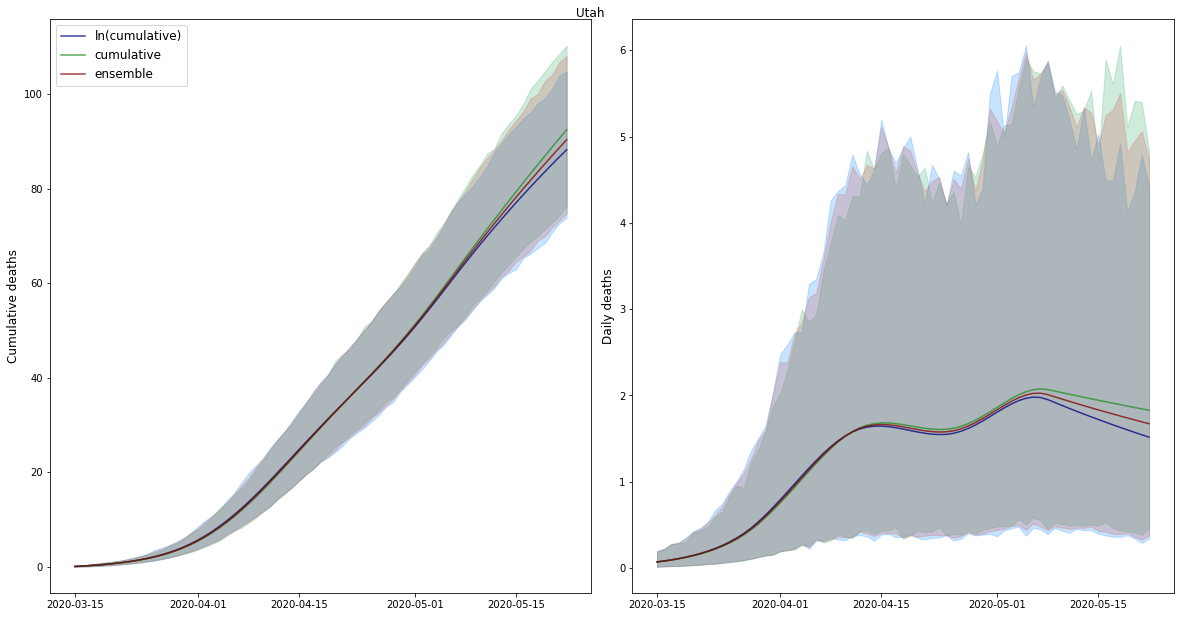

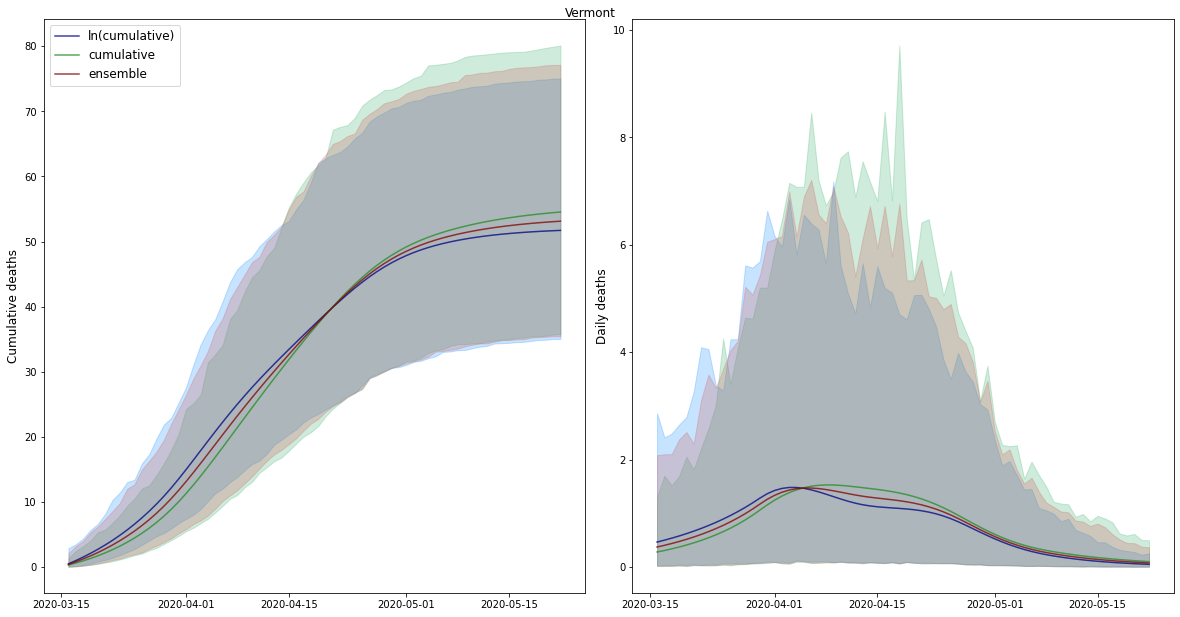

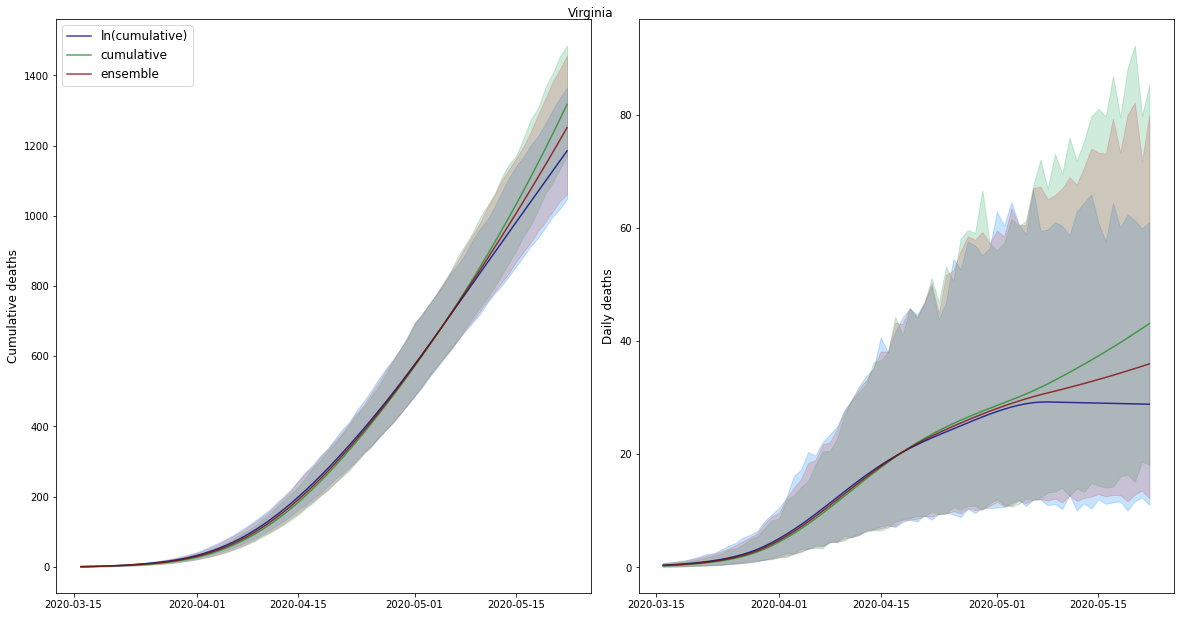

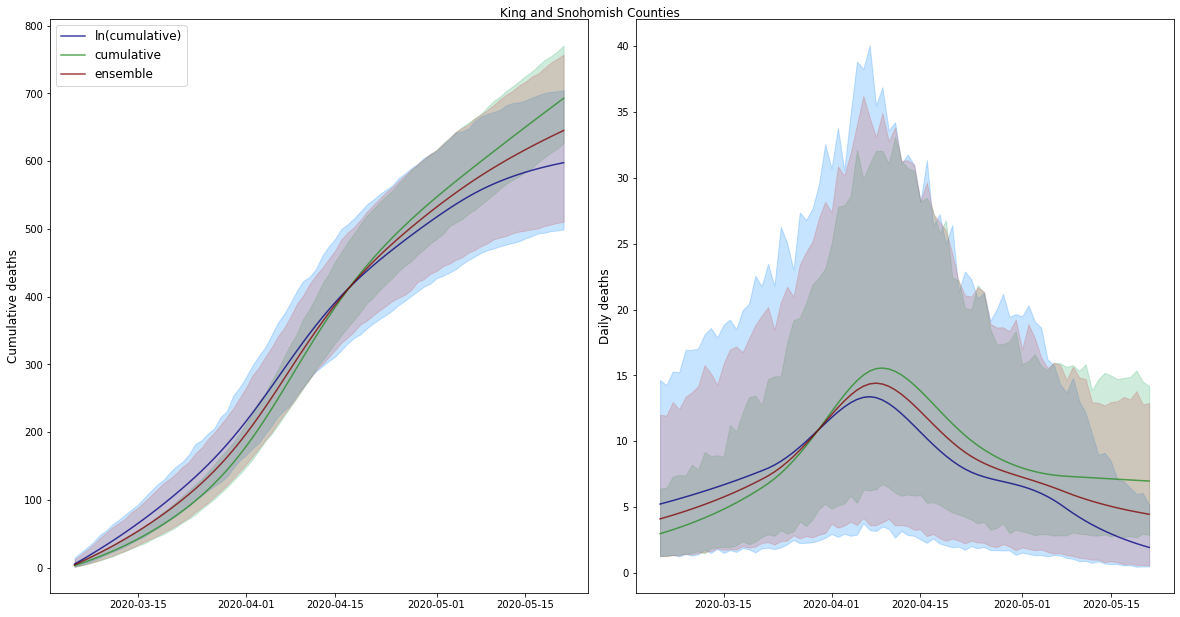

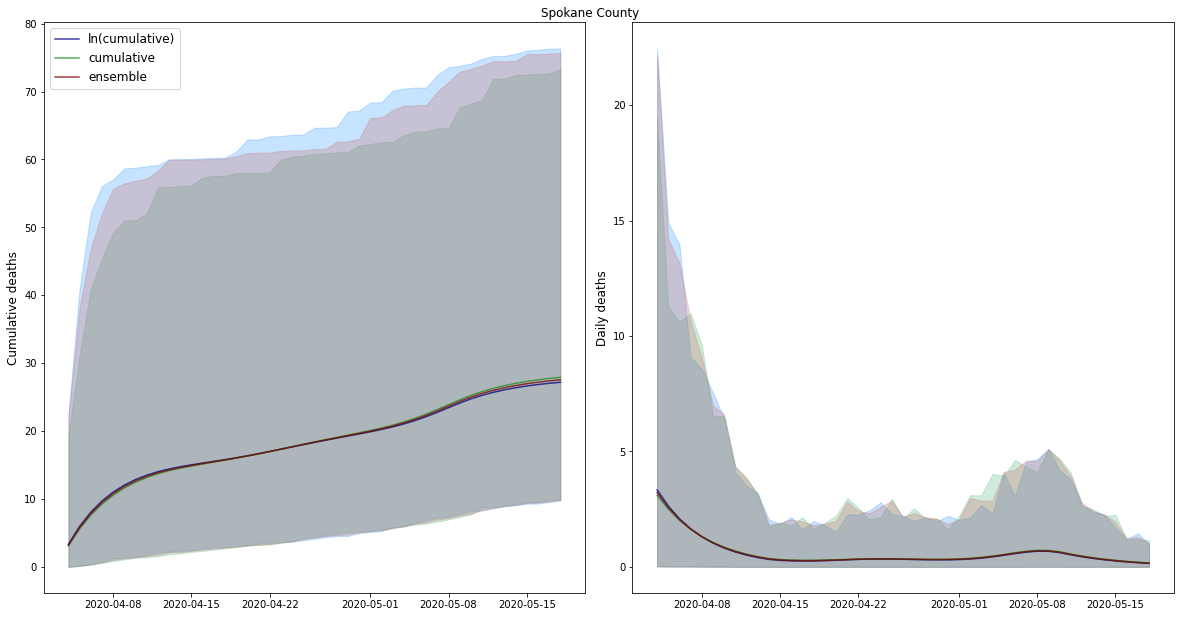

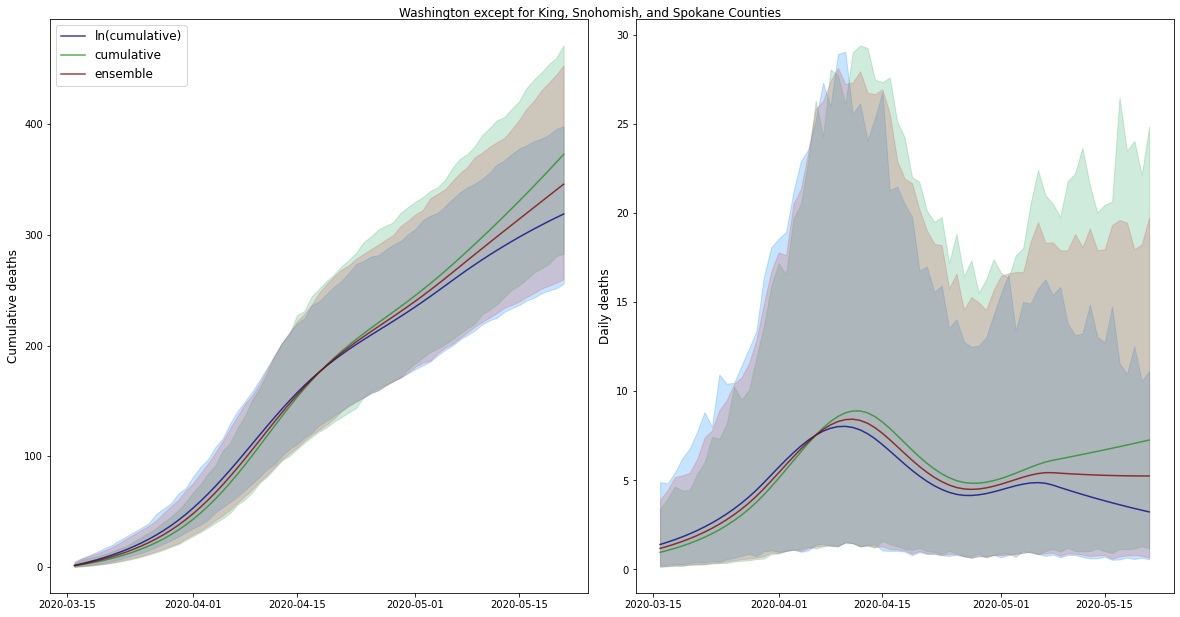

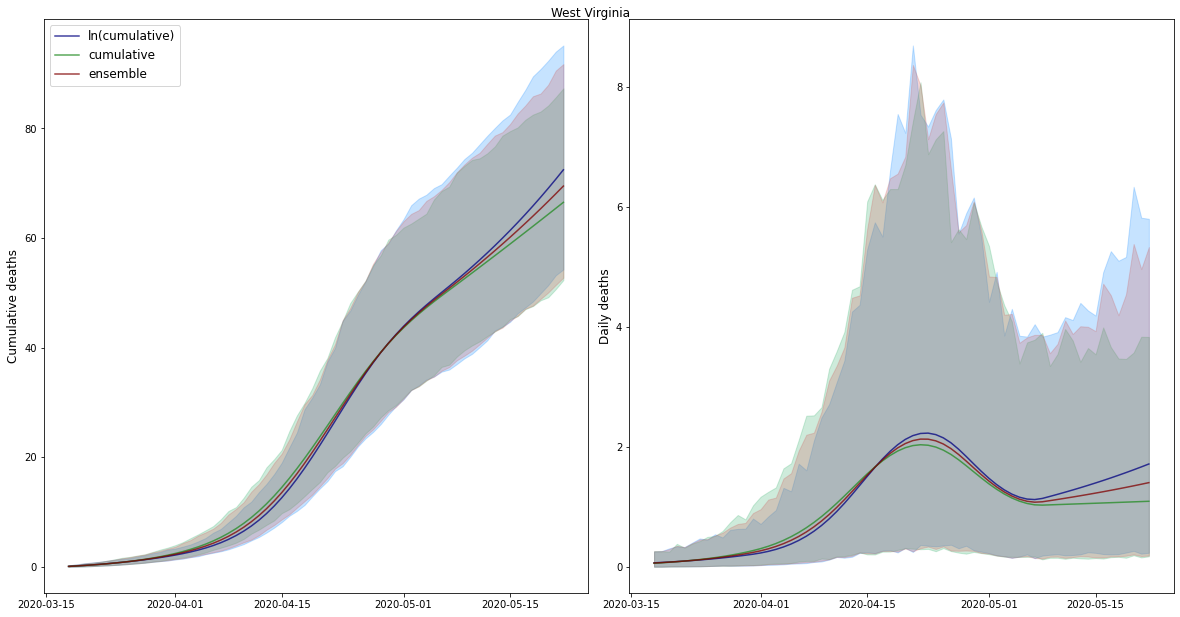

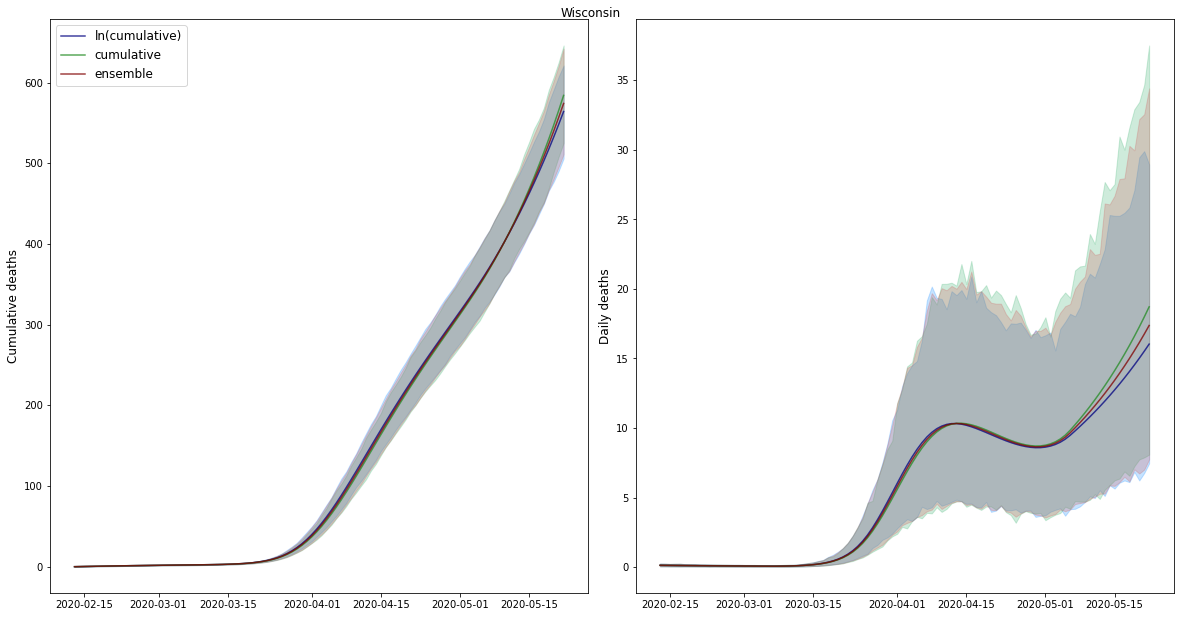

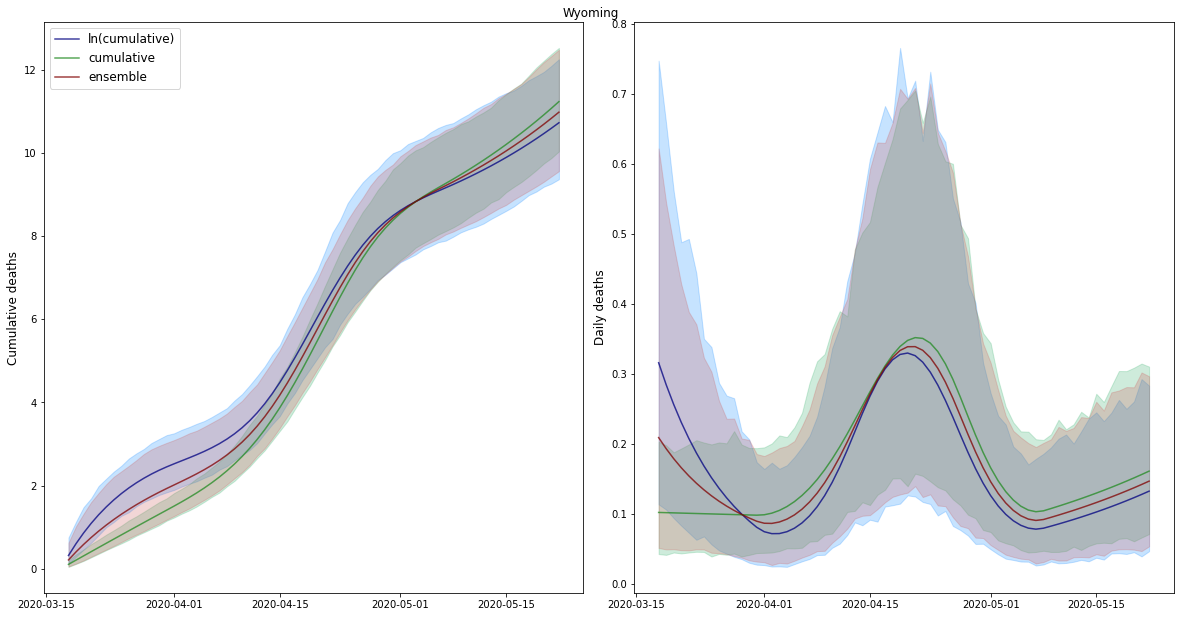

In [3]:
for location_id, location_name in zip(location_ids, location_names):
    fig, ax = plt.subplots(1, 2, figsize=(16.5, 8.5))
    for file_label, plot_label, fillcolor, linecolor in zip(['model_results_ln_cumul', 'model_results_cumul', 'model_results'],
                                                            ['ln(cumulative)', 'cumulative', 'ensemble'],
                                                            ['dodgerblue', 'mediumseagreen', 'indianred'],
                                                            ['navy', 'forestgreen', 'maroon']):
        plot_est = est_dfs[file_label].loc[est_dfs[file_label]['location_id'] == location_id].reset_index(drop=True)

        # observed
        ax[0].plot(plot_est['date'], plot_est['Cumulative mean'],
                   color=linecolor, alpha=0.75,
                   label=plot_label)
        ax[0].fill_between(plot_est['date'], 
                           plot_est['Cumulative lower'], plot_est['Cumulative upper'],
                           color=fillcolor, alpha=0.25)
        ax[0].set_ylabel('Cumulative deaths', fontsize=12)
        ax[1].plot(plot_est['date'], plot_est['Daily mean'],
                   color=linecolor, alpha=0.75)
        ax[1].fill_between(plot_est['date'], 
                           plot_est['Daily lower'], plot_est['Daily upper'],
                           color=fillcolor, alpha=0.25)
        ax[1].set_ylabel('Daily deaths', fontsize=12)

        ax[0].legend(loc=2, fontsize=12)
    fig.suptitle(location_name, y=1.0025)
    fig.tight_layout()


In [6]:
-18 + -16*0.05

-18.8